In [1]:
import pandas as pd
import numpy as np
import glob
import re
import seaborn as sns 
import matplotlib.pyplot as plt

## General visualizations of Eye tracker data health

In [2]:
data_frame = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/Complete_Data_AngularV.cvs")

In [3]:
my_categories = {'Global_Landmark': '#e2514a', 
                 'TaskBuilding_Public': '#fca55d',
                'TaskBuilding_Residential': '#fee999',
                'Active_Agent': '#a2d9a4',
                'Passive_Agent': '#47a0b3'}

In [4]:
data_frame.head(50)

,Unnamed: 0,level_0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,...,combined_vel,thresh,isFix,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN
0,0,0,0,1031,1,1,1.668436e+09,0.961232,0.926746,4.411026,...,NaN,42.933244,NaN,NaN,NaN,NaN,NaN,NaN,pavement_O.002,Background
1,1,1,1,1031,1,1,1.668436e+09,0.961232,0.926746,4.411026,...,0.000000,42.933244,0.000000,NaN,2.0,0.011408,6.394362,6.394362,pavement_O.002,Background
2,2,2,2,1031,1,1,1.668436e+09,0.961232,0.926746,4.331100,...,0.000000,42.933244,0.000000,NaN,-2.0,0.011408,6.394362,6.394362,pavement_O.002,Background
3,3,3,3,1031,1,1,1.668436e+09,0.949373,0.903610,4.308182,...,144.818129,42.933244,NaN,144.818129,-1.0,0.021328,NaN,NaN,pavement_O.002,Background
4,4,4,4,1031,1,1,1.668436e+09,0.953444,0.894463,4.254364,...,0.000000,42.933244,0.000000,0.000000,2.0,0.183023,6.577809,6.585500,pavement_O.002,Background
5,5,5,5,1031,1,1,1.668436e+09,0.943757,0.886821,4.159210,...,4.764331,42.933244,4.764331,4.764331,NaN,0.183023,6.577829,6.585500,pavement_O.002,Background
6,6,6,6,1031,1,1,1.668436e+09,0.939645,0.897497,4.020706,...,14.262029,42.933244,14.262029,14.262029,NaN,0.183023,6.581209,6.585500,pavement_O.002,Background
7,7,7,7,1031,1,1,1.668436e+09,0.925597,0.902853,4.014542,...,18.972295,42.933244,18.972295,18.972295,NaN,0.183023,6.584319,6.585500,pavement_O.002,Background
8,8,8,8,1031,1,1,1.668436e+09,0.932548,0.910339,3.987549,...,37.265736,42.933244,37.265736,37.265736,NaN,0.183023,6.589390,6.585500,pavement_O.002,Background
9,9,9,9,1031,1,1,1.668436e+09,0.944094,0.917975,3.963394,...,1.301756,42.933244,1.301756,1.301756,NaN,0.183023,6.589534,6.585500,pavement_O.002,Background


In [5]:
# Just if I wanted to keep only complete cases 
#Mask_IDs = data_frame['SubjectID'].isin([479, 2361, 3246, 3572, 3976, 5238, 5531, 7264, 8695])
#data_frame_final = data_frame.loc[~Mask_IDs]

In [6]:
data_frame.combinedGazeValidityBitmask.value_counts(normalize=True)

combinedGazeValidityBitmask
3    0.946371
0    0.053629
Name: proportion, dtype: float64

In [7]:
 pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
data_frame.columns

Index(['Unnamed: 0', 'level_0', 'index', 'SubjectID', 'Session',
       'SessionSubsection', 'timeStampDataPointEnd', 'eyeOpennessLeft',
       'eyeOpennessRight', 'pupilDiameterMillimetersLeft',
       ...
       'combined_vel', 'thresh', 'isFix', 'corrected_vel', 'events', 'length',
       'distance', 'avg_dist', 'names', 'Collider_CategoricalN'],
      dtype='object', length=113)

In [9]:
Just_Agents = data_frame[data_frame["Collider_CategoricalN"].isin(["Active_Agent", "Active_Agent_Face","Passive_Agent", "Passive_Agent_Face"])]

Just_Agents = Just_Agents[[ 'SubjectID', 'Session', 'SessionSubsection',
       'timeStampDataPointEnd', 'combinedGazeValidityBitmask','eyePositionCombinedWorld.x',
       'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z',
       'eyeDirectionCombinedWorld.y', 'eyeDirectionCombinedWorld.z',
       'eyeDirectionCombinedLocal.x', 'eyeDirectionCombinedLocal.y',
       'eyeDirectionCombinedLocal.z', 'playerBodyPosition.x',
       'playerBodyPosition.y', 'playerBodyPosition.z',
        'corrected_vel', 'events', 'length', 'distance', 'avg_dist', 'names',
       'Collider_CategoricalN']]
Just_Agents.head()
Just_Agents.head()
Just_Agents.to_csv("/Volumes/TwoTeras/PCA/Data_Sets/Just_Agents_Exp2.csv")

In [10]:
data_frame["Time_Shift"].describe()

count   17550638.000
mean           0.016
std            0.010
min            0.001
25%            0.011
50%            0.013
75%            0.022
max            0.994
Name: Time_Shift, dtype: float64

In [11]:
Blinks = pd.DataFrame(data_frame.groupby(["SubjectID", "Session"])["combinedGazeValidityBitmask"].value_counts(normalize=True))
Blinks.reset_index(inplace=True)
Blinks.loc[:, 'Validity'] = Blinks['combinedGazeValidityBitmask'].replace( {3:"Valid", 0:"Invalid"})

In [12]:
Blinks.head()

,SubjectID,Session,combinedGazeValidityBitmask,proportion,Validity
0,1031,1,3,0.972,Valid
1,1031,1,0,0.028,Invalid
2,1031,2,3,0.977,Valid
3,1031,2,0,0.023,Invalid
4,1031,3,3,0.970,Valid


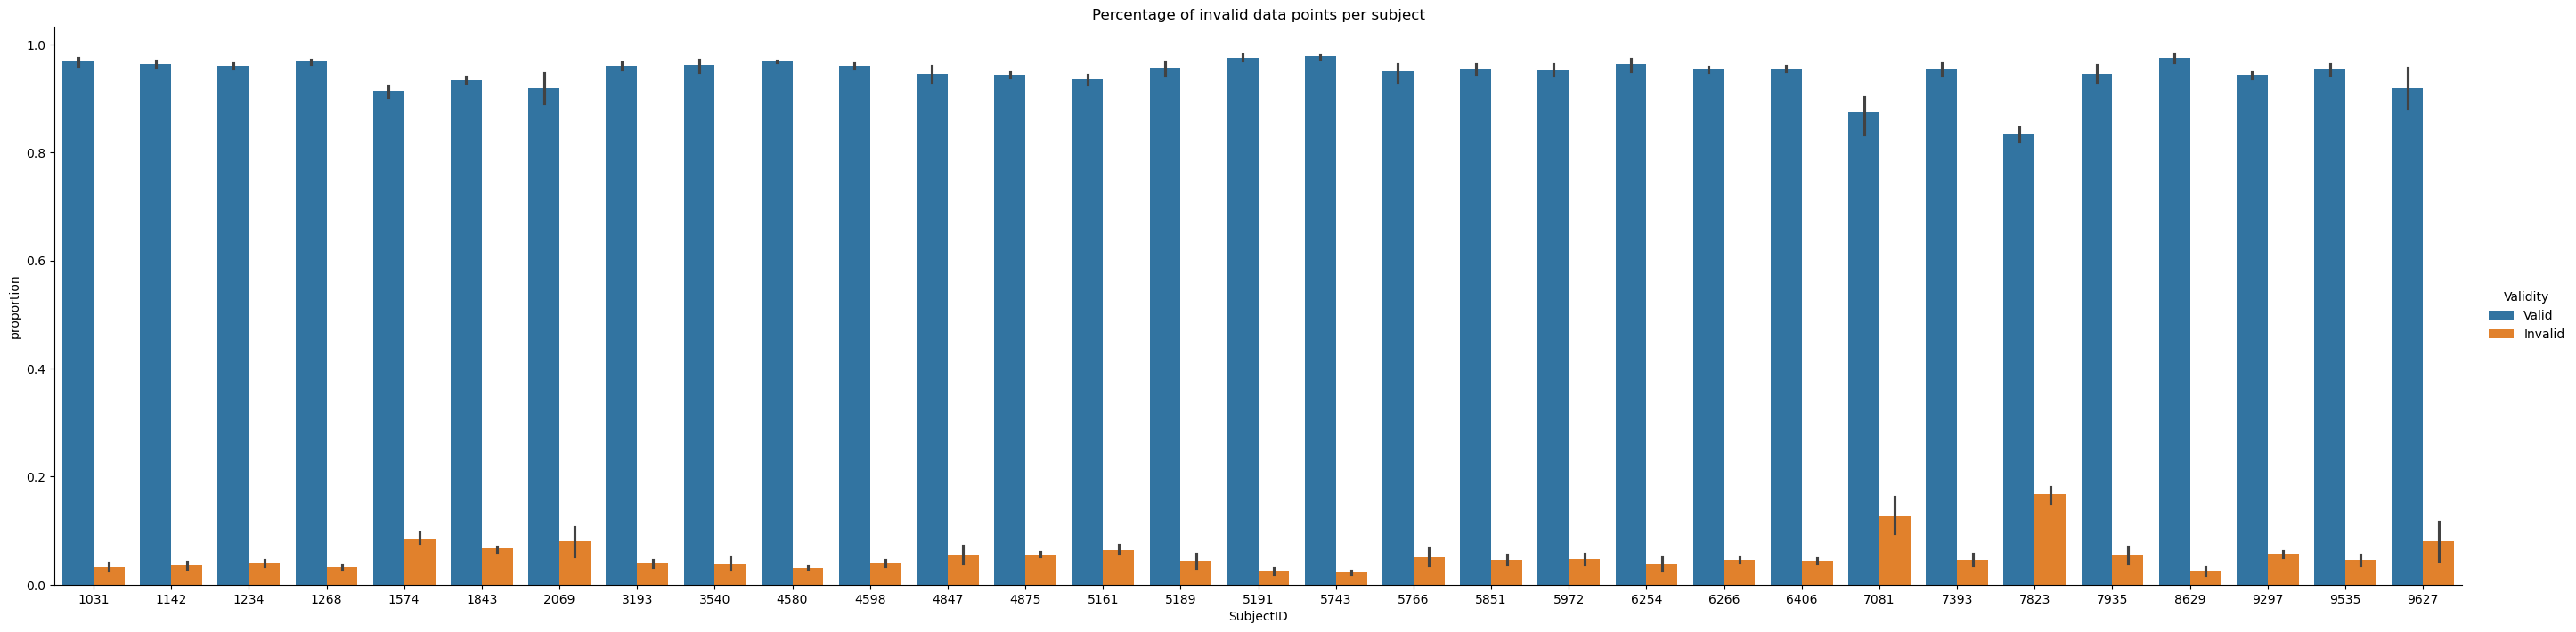

In [13]:
sns.catplot(data=Blinks, hue="Validity", y="proportion", x="SubjectID", kind="bar", \
            height=7, aspect=4).set(title="Percentage of invalid data points per subject")

In [14]:
data_frame.head()

,Unnamed: 0,level_0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,...,combined_vel,thresh,isFix,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN
0,0,0,0,1031,1,1,1668436068.838,0.961,0.927,4.411,...,NaN,42.933,NaN,NaN,NaN,NaN,NaN,NaN,pavement_O.002,Background
1,1,1,1,1031,1,1,1668436068.847,0.961,0.927,4.411,...,0.000,42.933,0.000,NaN,2.000,0.011,6.394,6.394,pavement_O.002,Background
2,2,2,2,1031,1,1,1668436068.859,0.961,0.927,4.331,...,0.000,42.933,0.000,NaN,-2.000,0.011,6.394,6.394,pavement_O.002,Background
3,3,3,3,1031,1,1,1668436068.880,0.949,0.904,4.308,...,144.818,42.933,NaN,144.818,-1.000,0.021,NaN,NaN,pavement_O.002,Background
4,4,4,4,1031,1,1,1668436068.901,0.953,0.894,4.254,...,0.000,42.933,0.000,0.000,2.000,0.183,6.578,6.585,pavement_O.002,Background


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/2271715428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=plot, col="SubjectID", y="Continuous_Time", x="Session",  col_wrap=4, palette="flare")


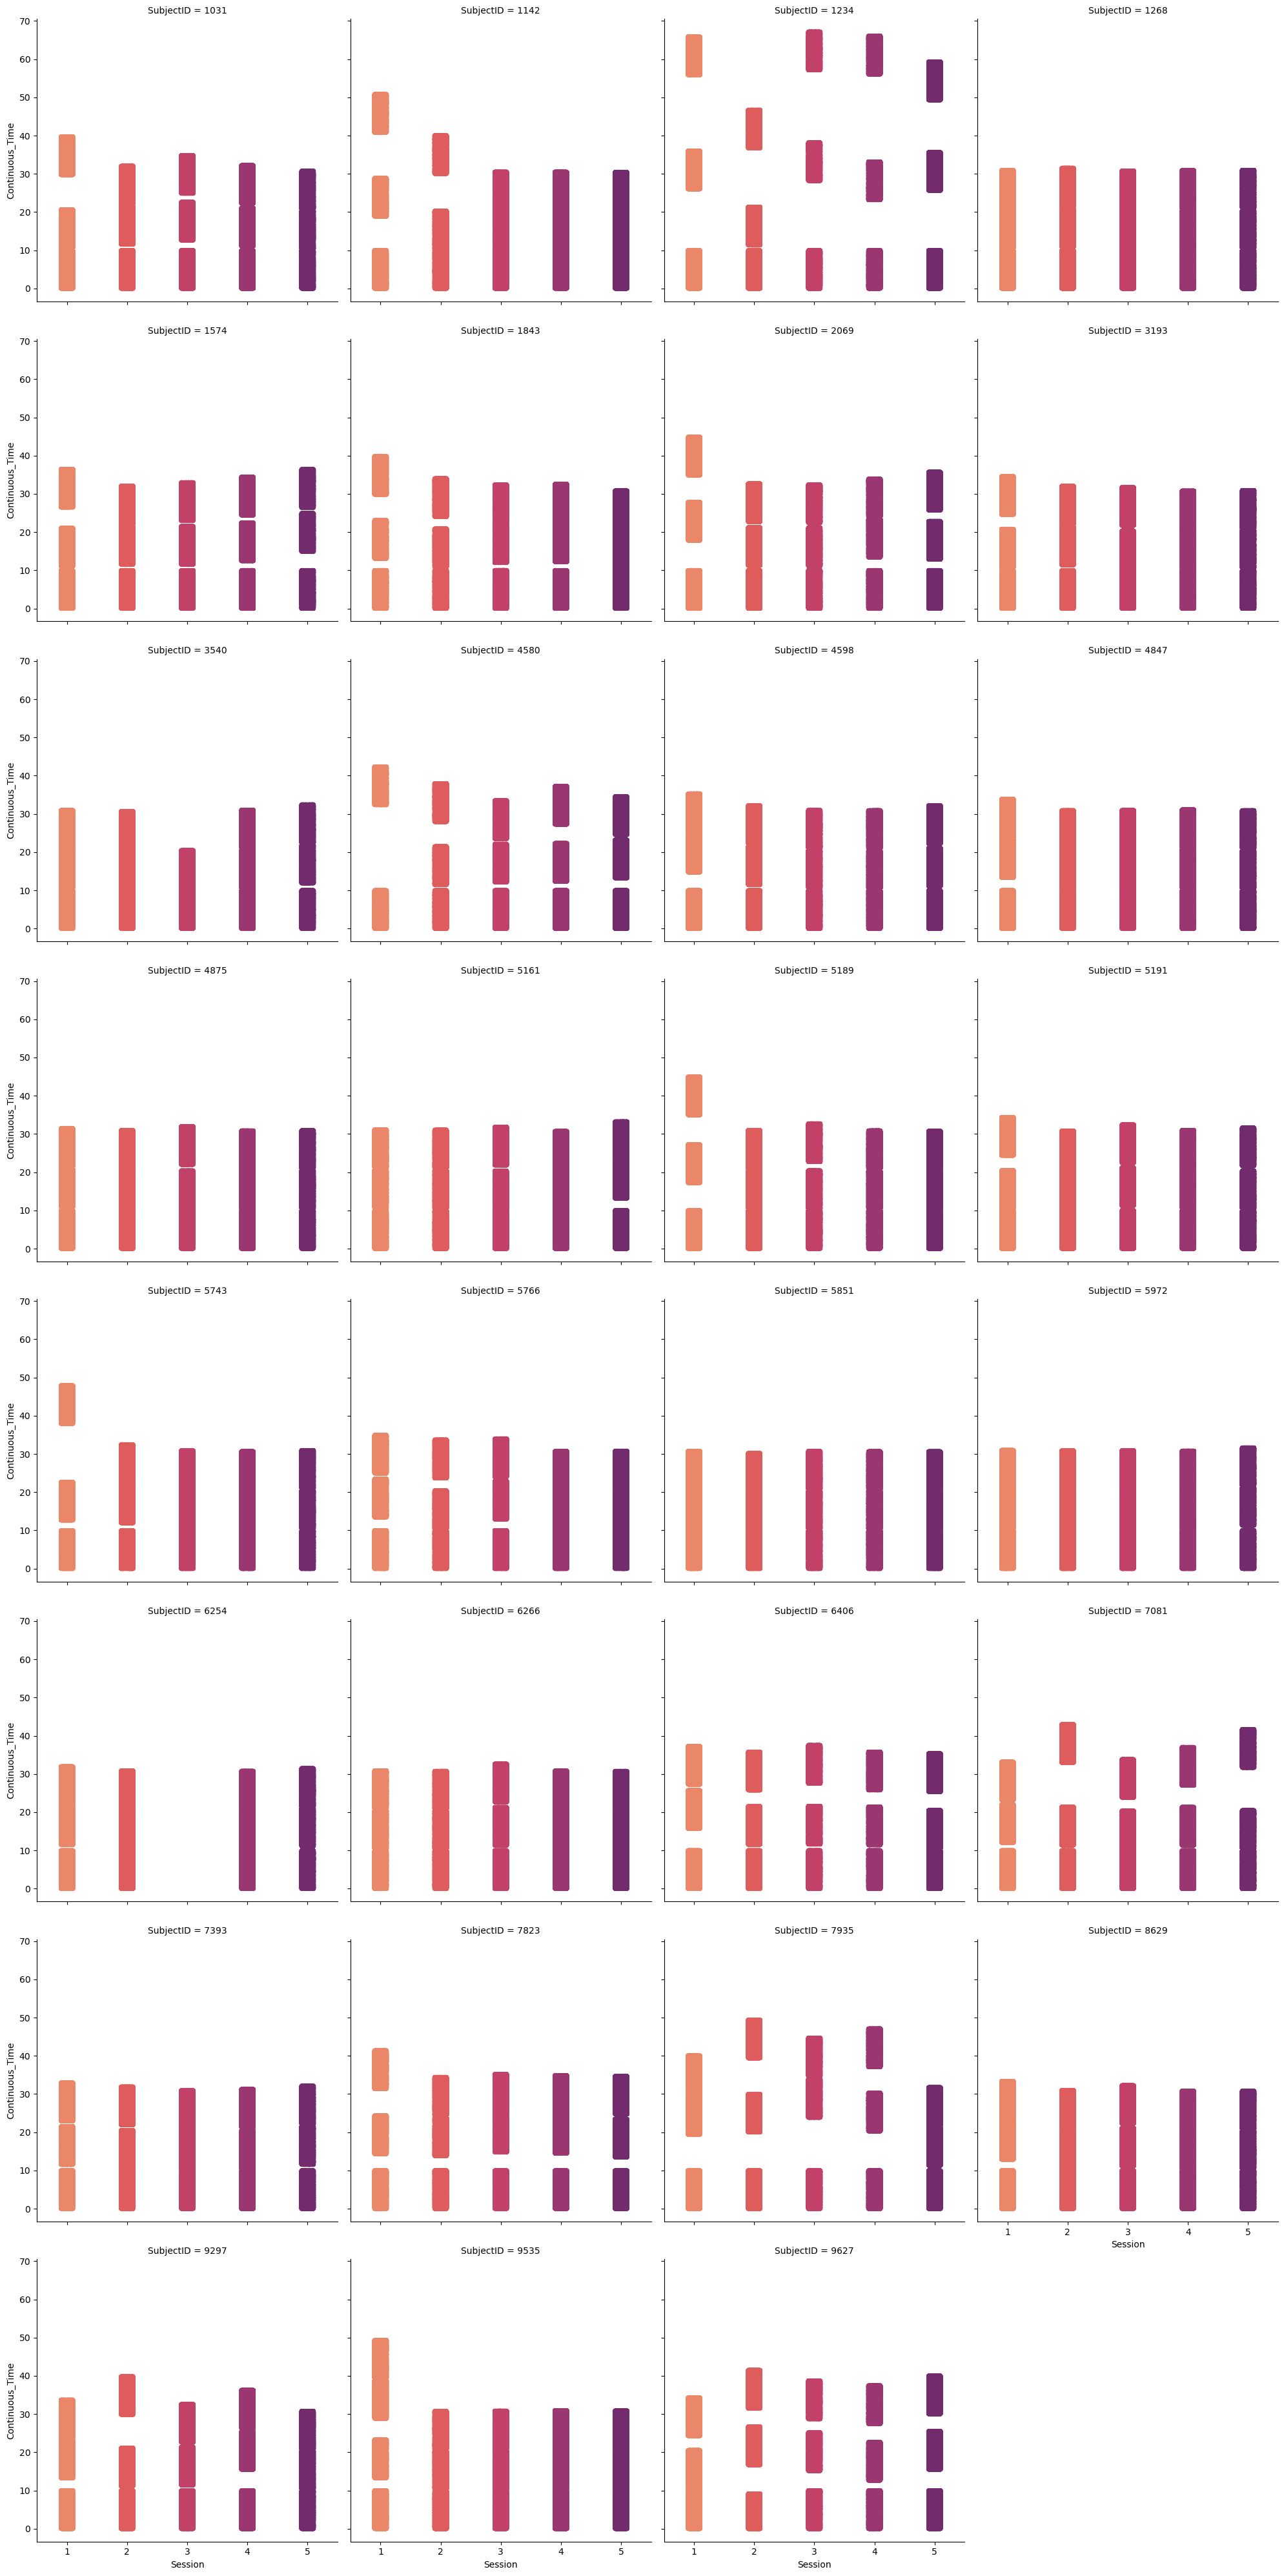

In [15]:
plot = data_frame[data_frame.Continuous_Time < 120]
sns.catplot(data=plot, col="SubjectID", y="Continuous_Time", x="Session",  col_wrap=4, palette="flare")

## Gaze processing

In [16]:
# Take  final row per fixation (the duration, average distance is the same all through the rows of the same fixation)
gaze = data_frame[data_frame.events == 2].copy()

### Get all gazes whose duration is more than 3.5 median standard deviations out 

In [17]:
gaze["Median_Standard_Duration"] = np.nanmedian(abs(gaze.length - np.nanmedian(gaze.length))) * 1.4826
gaze.loc[:, "gaze_mad_z"] = abs(gaze.length.tolist() - np.nanmedian(gaze.length)) / gaze.Median_Standard_Duration.tolist()
gaze.loc[:,"Outlier_Gaze_Length"] = np.where(gaze["gaze_mad_z"] > 3.5, "Out", "Stays")
gaze_no_out = gaze[gaze.Outlier_Gaze_Length != "Out"].copy()
gaze_no_out.to_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/Complete_Data_AngularV_NO_Outliers.cvs")

In [18]:
gaze.Outlier_Gaze_Length.value_counts(normalize=True)

Outlier_Gaze_Length
Stays   0.954
Out     0.046
Name: proportion, dtype: float64

In [19]:
# See how many data points we're loosing by excluding outliers 
display(gaze.shape)
display(gaze_no_out.shape)

(876427, 116)

(835764, 116)

### Gaze Visualizations on complete data 

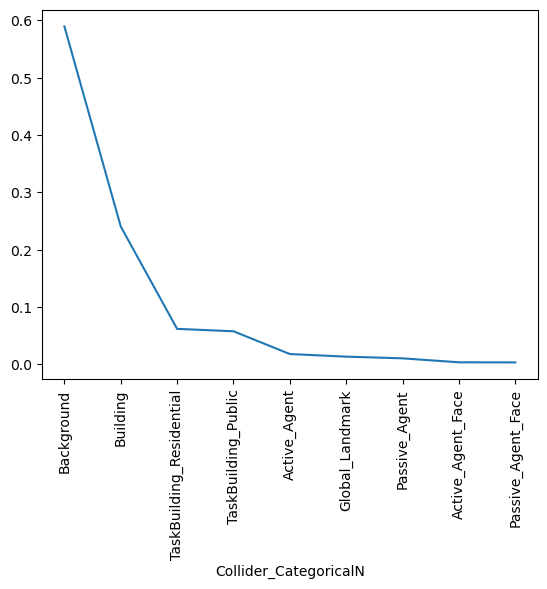

In [20]:
ax = gaze_no_out.Collider_CategoricalN.value_counts(normalize=True).plot()
ax.tick_params(axis='x', labelrotation = 90)

In [21]:
gaze_no_out.SubjectID.unique()

array([1031, 1268, 1574, 1843, 2069, 3193, 3540, 4580, 4598, 4847, 4875,
       5161, 5189, 5743, 5766, 5851, 5972, 6406, 7081, 7393, 7823, 7935,
       8629, 9297, 9627, 1142, 1234, 6266, 5191, 6254, 9535])

In [22]:
#General plotting settings
sns.set(rc={"figure.figsize":(20, 15)})
sns.set(font_scale = 1.3)
plt.tight_layout()

<Figure size 2000x1500 with 0 Axes>

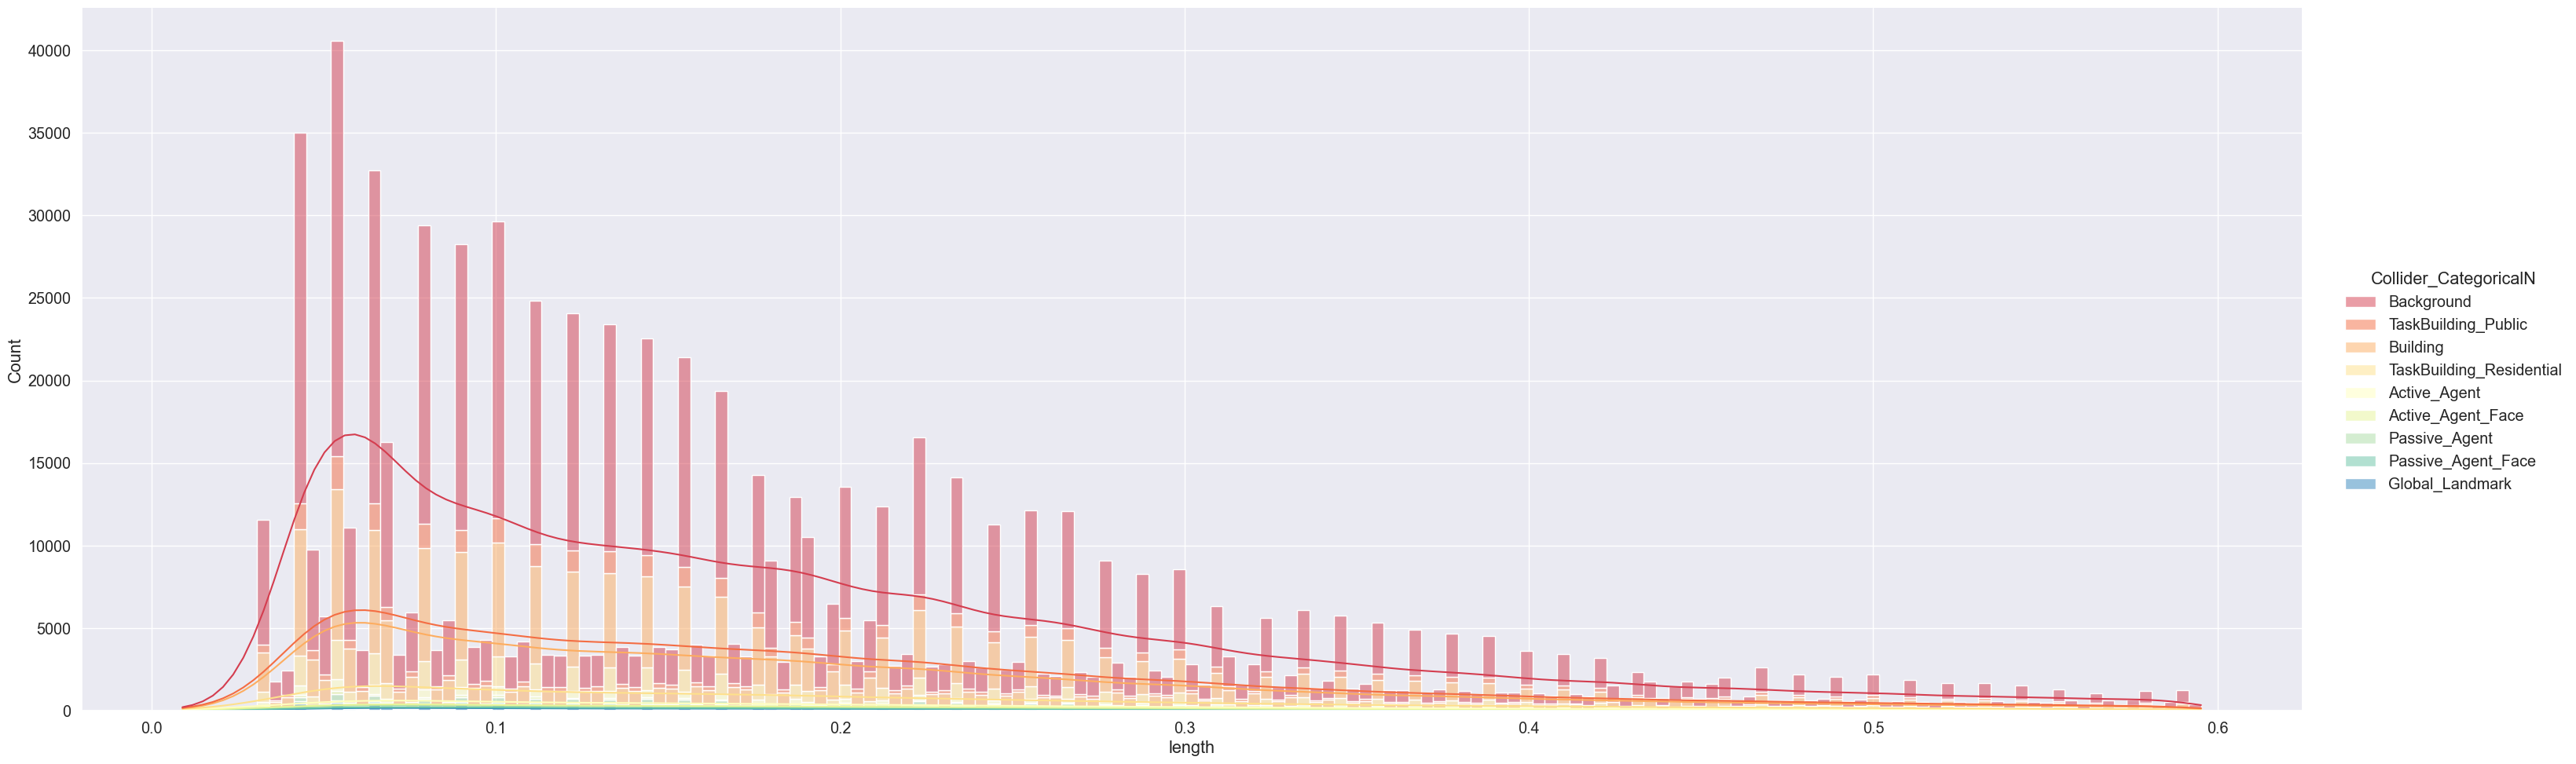

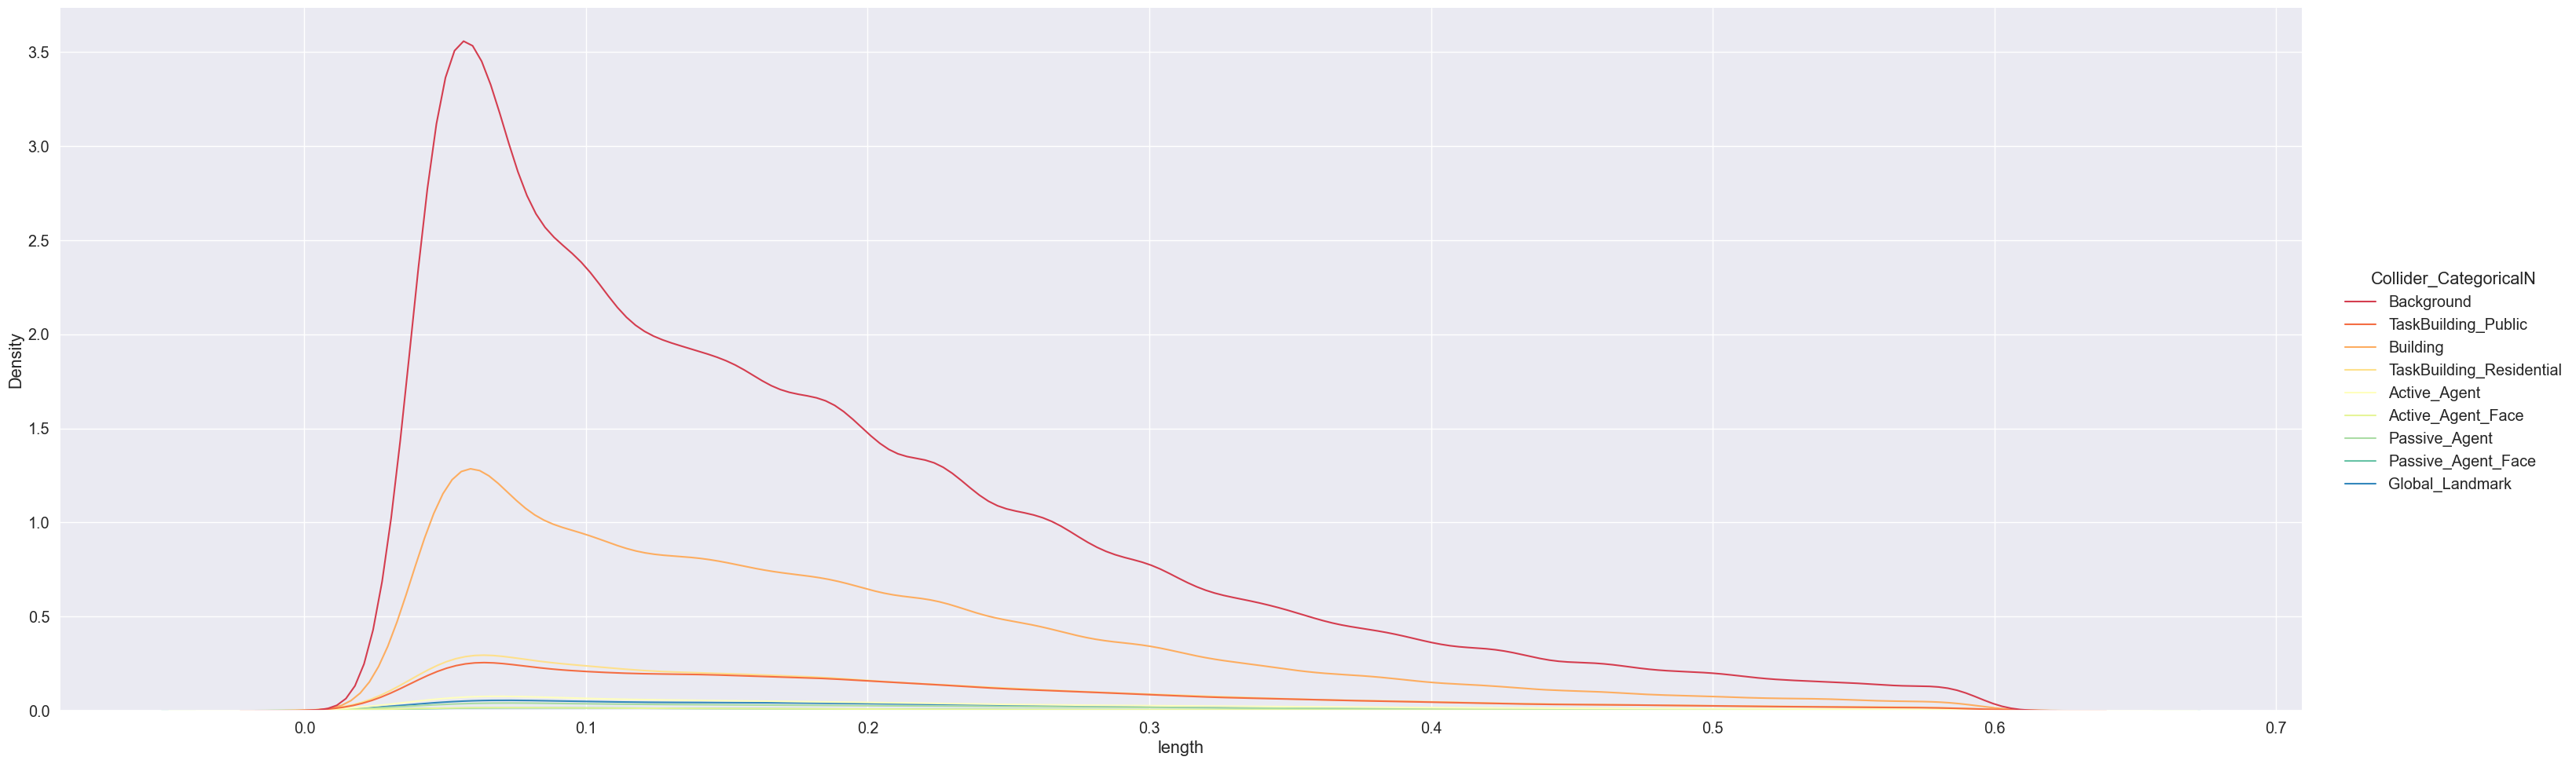

In [23]:
sns.displot(x='length', hue="Collider_CategoricalN",
             data=gaze_no_out, 
            height=10, aspect= 3, kde=True, palette="Spectral",  multiple="stack")

sns.displot(x='length', hue="Collider_CategoricalN",
             data=gaze_no_out, 
            height=10, aspect= 3, kind="kde", palette="Spectral")

In [24]:
# Since the collider names are too detailed, here we create a dictionary with patterns to classify them into our categories of interest
patterns = {'\d{2}_Sa':'Passive_Agent', '\d{2}_Cma':'Active_Agent', 'Building_\d+': 'Building'}
patterns.update(dict.fromkeys(['Castle-TaskBuilding_56', 'Crane_59','HighSilo-TaskBuilding_49', 'Windmill-TaskBuilding_10_1', 'Church-TaskBuilding_16'], 'Global_Landmark'))
patterns.update(dict.fromkeys(['^TaskBuilding_2$','^TaskBuilding_3$', '^TaskBuilding_5$', '^TaskBuilding_8$', '^TaskBuilding_9$', '^TaskBuilding_11$', '^TaskBuilding_13$', '^TaskBuilding_14$', '^TaskBuilding_20$', 
                               '^TaskBuilding_21$', '^TaskBuilding_23$','^TaskBuilding_27$', '^TaskBuilding_29$', '^TaskBuilding_32$', '^TaskBuilding_34$',  '^TaskBuilding_38$', '^TaskBuilding_41$', '^TaskBuilding_42$', 
                               '^TaskBuilding_44$', '^TaskBuilding_45$', '^TaskBuilding_47$', '^TaskBuilding_50$', '^TaskBuilding_51$', '^TaskBuilding_52$', 'BasketballCourt_58', 'Construction_57', 
                               '^Graffity_02$', '^Graffity_03$', '^Graffity_05$', '^Graffity_08$', '^Graffity_09$', '^Graffity_11$', '^Graffity_13$', '^Graffity_14$', '^Graffity_20$', 
                               '^Graffity_21$', '^Graffity_23$', '^Graffity_27$', '^Graffity_29$', '^Graffity_32$', '^Graffity_34$', '^Graffity_38$', '^Graffity_41$', '^Graffity_42$', 
                               '^Graffity_44$', '^Graffity_45$', '^Graffity_47$',  '^Graffity_50$', '^Graffity_51$', '^Graffity_52$'], 'TaskBuilding_Public'))

patterns.update(dict.fromkeys(['^TaskBuilding_1$','^TaskBuilding_4$', '^TaskBuilding_6$', '^TaskBuilding_7$', '^TaskBuilding_12$', '^TaskBuilding_15$', '^TaskBuilding_17$', '^TaskBuilding_18$', '^TaskBuilding_19$', 
                               '^TaskBuilding_22$', '^TaskBuilding_24$','^TaskBuilding_25$', '^TaskBuilding_26$', '^TaskBuilding_28$', '^TaskBuilding_30$',  '^TaskBuilding_31$', '^TaskBuilding_33$', '^TaskBuilding_35$', 
                               '^TaskBuilding_36$', '^TaskBuilding_37$', '^TaskBuilding_39$', '^TaskBuilding_40$', '^TaskBuilding_43$', '^TaskBuilding_48$', '^TaskBuilding_54$','^TaskBuilding_55$',
                               '^Graffity_01$','^Graffity_04$', '^Graffity_06$', '^Graffity_07$', '^Graffity_12$', '^Graffity_15$', '^Graffity_17$', '^Graffity_18$', '^Graffity_19$', '^Graffity_22$', 
                               '^Graffity_24$','^Graffity_25$', '^Graffity_26$', '^Graffity_28$', '^Graffity_30$',  '^Graffity_31$', '^Graffity_33$', '^Graffity_35$', '^Graffity_36$', '^Graffity_37$', '^Graffity_39$', 
                               '^Graffity_40$', '^Graffity_43$', '^Graffity_48$', '^Graffity_54$', '^Graffity_55$' ], 'TaskBuilding_Residential'))
default_val = 'Background'

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/4156940148.py:2: SyntaxWarning: invalid escape sequence '\d'
  patterns = {'\d{2}_Sa':'Passive_Agent', '\d{2}_Cma':'Active_Agent', 'Building_\d+': 'Building'}
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/4156940148.py:2: SyntaxWarning: invalid escape sequence '\d'
  patterns = {'\d{2}_Sa':'Passive_Agent', '\d{2}_Cma':'Active_Agent', 'Building_\d+': 'Building'}
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/4156940148.py:2: SyntaxWarning: invalid escape sequence '\d'
  patterns = {'\d{2}_Sa':'Passive_Agent', '\d{2}_Cma':'Active_Agent', 'Building_\d+': 'Building'}


In [25]:
gaze_no_out["Collider_CategoricalN"] =  gaze_no_out['names'].apply(lambda x: next((val for key, val in patterns.items() if re.match(key, x)), default_val))
#string_to_add = "_Face"
# Define the condition and the string to add
#Mask_1f = ((data_frame_gaze_no_out_ONLY_TEST['Collider_CategoricalN'] == "Active_Agent") & (data_frame_gaze_no_out_ONLY_TEST['Face_Hits'] == "Face")) | ((data_frame_gaze_no_out_ONLY_TEST['Collider_CategoricalN'] == "Passive_Agent") & (data_frame_gaze_no_out_ONLY_TEST['Face_Hits'] == "Face"))
#data_frame_gaze_no_out_ONLY_TEST.loc[Mask_1f, 'Collider_CategoricalN'] = data_frame_gaze_no_out_ONLY_TEST.loc[Mask_1f, 'Collider_CategoricalN'] + string_to_add

In [26]:
#Keep only the gazes that happened on the categories of interest
data_frame_gaze_no_out_ONLY_TEST = gaze_no_out[(gaze_no_out.Collider_CategoricalN != "Background") & (gaze_no_out.Collider_CategoricalN != "Building")].copy()
#One with all buildings
data_frame_gaze_no_out_Buildings = gaze_no_out[(gaze_no_out.Collider_CategoricalN != "Background")].copy()

In [27]:
data_frame_gaze_no_out_ONLY_TEST.Collider_CategoricalN.value_counts(normalize=True)

Collider_CategoricalN
TaskBuilding_Residential   0.365
TaskBuilding_Public        0.340
Active_Agent               0.129
Passive_Agent              0.084
Global_Landmark            0.081
Name: proportion, dtype: float64

In [28]:
data_frame_gaze_no_out_ONLY_TEST.head()

,Unnamed: 0,level_0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,...,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length
58,58,58,58,1031,1,1,1668436069.815,1.000,1.000,3.341,...,15.565,2.000,0.171,130.954,130.974,TaskBuilding_27,TaskBuilding_Public,0.125,0.107,Stays
214,214,214,214,1031,1,1,1668436071.957,0.920,0.945,3.651,...,25.718,2.000,0.088,9.925,9.926,TaskBuilding_35,TaskBuilding_Residential,0.125,0.555,Stays
225,225,225,225,1031,1,1,1668436072.180,0.965,0.999,3.686,...,21.310,2.000,0.078,12.306,12.321,TaskBuilding_35,TaskBuilding_Residential,0.125,0.639,Stays
232,232,232,232,1031,1,1,1668436072.324,1.000,1.000,3.727,...,5.401,2.000,0.310,7.233,7.232,23_Cma,Active_Agent,0.125,1.218,Stays
250,250,250,250,1031,1,1,1668436072.679,1.000,1.000,4.039,...,1.913,2.000,0.311,12.383,12.375,Graffity_35,TaskBuilding_Residential,0.125,1.230,Stays


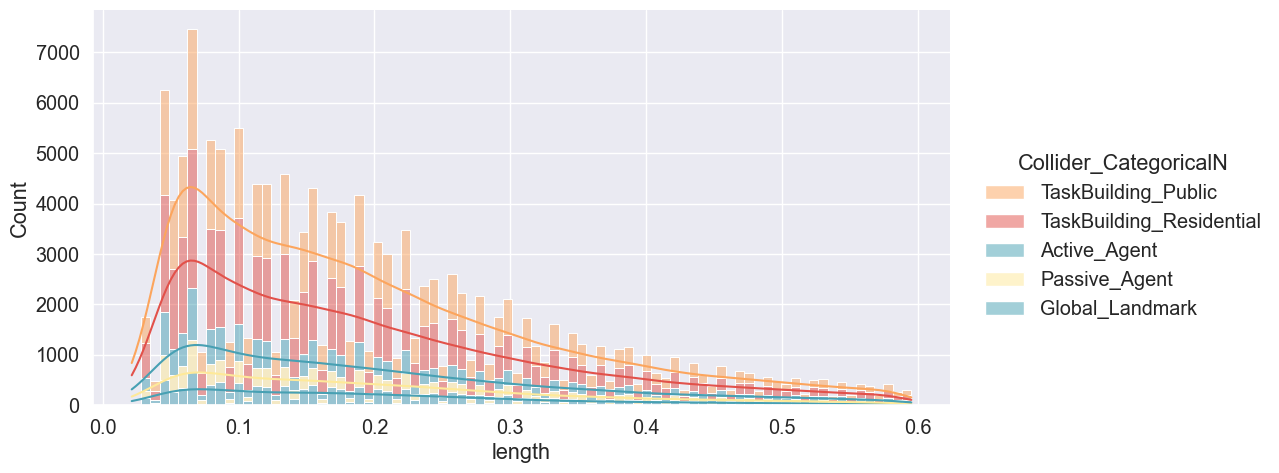

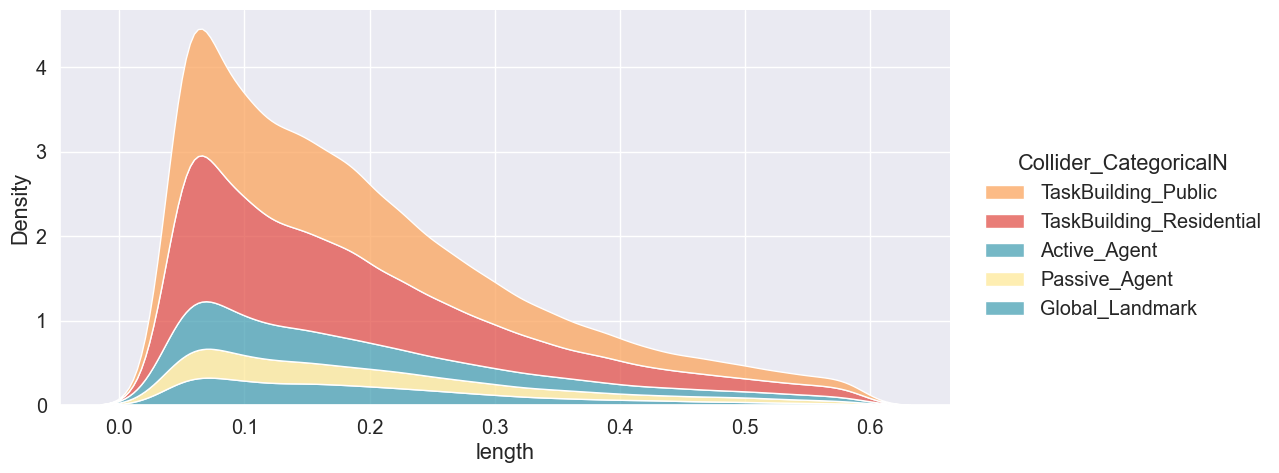

In [29]:
my_Categories = {'TaskBuilding_Residential': '#e2514a', 'Passive_Agent':'#fee999', 'TaskBuilding_Public': '#fca55d',
       'Global_Landmark':'#47a0b3', 'Active_Agent':'#47a0b3'}
sns.displot(x='length', hue="Collider_CategoricalN",
             data=data_frame_gaze_no_out_ONLY_TEST, 
            height=5, aspect= 2, kde=True, palette=my_Categories,  multiple="stack")

sns.displot(x='length', hue="Collider_CategoricalN",
             data=data_frame_gaze_no_out_ONLY_TEST, 
            height=5, aspect= 2, kind="kde", palette=my_Categories, multiple="stack")

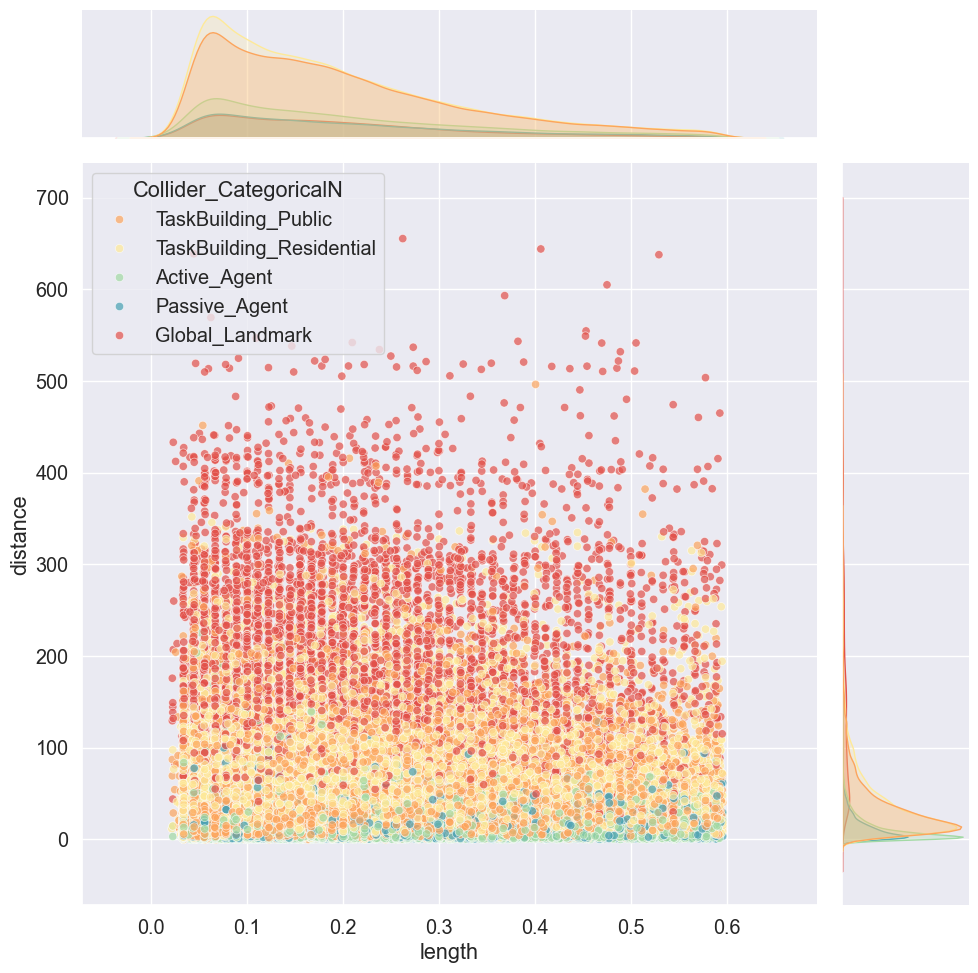

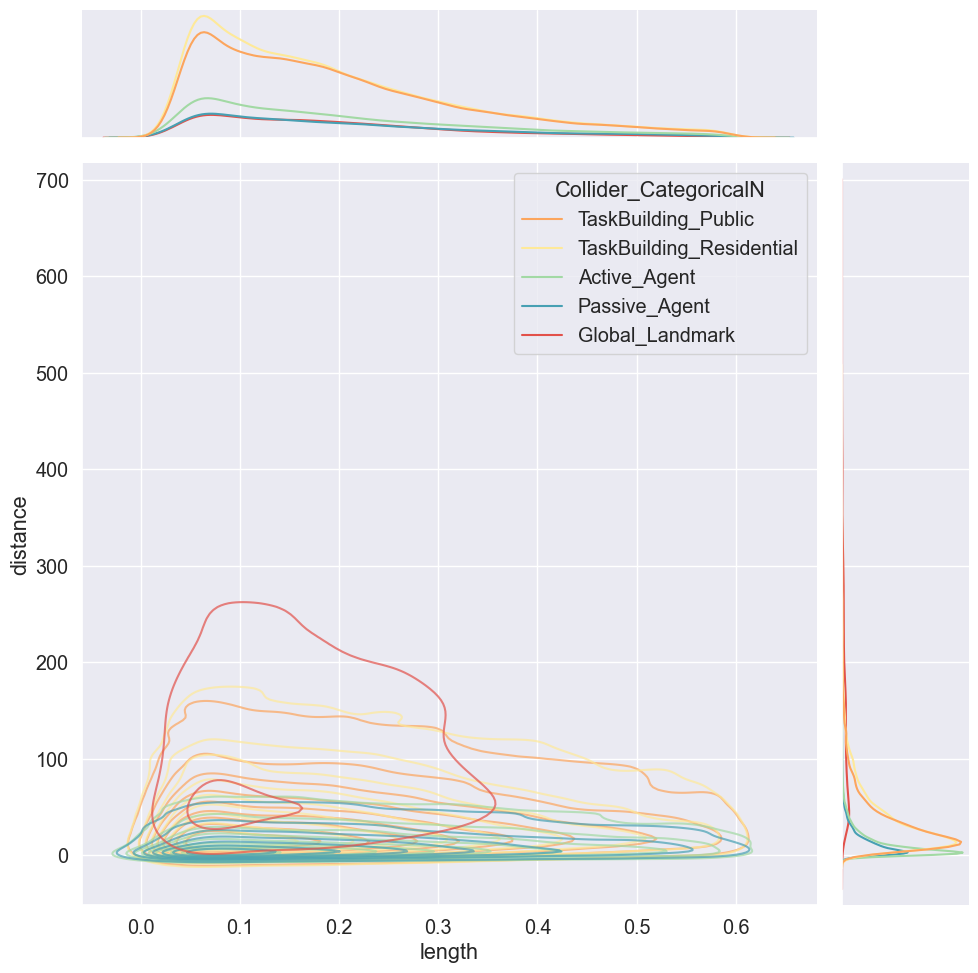

In [30]:
sns.jointplot(data=data_frame_gaze_no_out_ONLY_TEST, y="distance", x="length", hue="Collider_CategoricalN",  height=10, alpha=0.7, palette=my_categories)
sns.jointplot(data=data_frame_gaze_no_out_ONLY_TEST, y="distance", x="length", hue="Collider_CategoricalN",  height=10, alpha=0.7, palette=my_categories,  kind="kde")

In [31]:
# Create a Dictionary that identifies agent, graffity and house into this three categories
patterns2 = {'\d{2}_Sa':'Agent', '\d{2}_Cma':'Agent', '^TaskBuilding_': 'Building', 'BasketballCourt_58': 'Building', '^Graffity':'Graffity'}
patterns2.update(dict.fromkeys(['Castle-TaskBuilding_56', 'Crane_59','HighSilo-TaskBuilding_49', 'Windmill-TaskBuilding_10_1', 'Church-TaskBuilding_16'], 'Global_Landmark'))

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/1524466946.py:2: SyntaxWarning: invalid escape sequence '\d'
  patterns2 = {'\d{2}_Sa':'Agent', '\d{2}_Cma':'Agent', '^TaskBuilding_': 'Building', 'BasketballCourt_58': 'Building', '^Graffity':'Graffity'}
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/1524466946.py:2: SyntaxWarning: invalid escape sequence '\d'
  patterns2 = {'\d{2}_Sa':'Agent', '\d{2}_Cma':'Agent', '^TaskBuilding_': 'Building', 'BasketballCourt_58': 'Building', '^Graffity':'Graffity'}


In [32]:
data_frame_gaze_no_out_ONLY_TEST['Hit_Object_Category'] = data_frame_gaze_no_out_ONLY_TEST['names'].apply(lambda x: next((val for key, val in patterns2.items() if re.match(key, x)), default_val))
data_frame_gaze_no_out_Buildings['Hit_Object_Category'] = data_frame_gaze_no_out_Buildings['names'].apply(lambda x: next((val for key, val in patterns2.items() if re.match(key, x)), default_val))

In [33]:
data_frame_gaze_no_out_ONLY_TEST = data_frame_gaze_no_out_ONLY_TEST.loc[:, ~data_frame_gaze_no_out_ONLY_TEST.columns.str.contains('^Unnamed')]
data_frame_gaze_no_out_ONLY_TEST.head()

,level_0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,pupilDiameterMillimetersRight,...,events,length,distance,avg_dist,names,Collider_CategoricalN,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length,Hit_Object_Category
58,58,58,1031,1,1,1668436069.815,1.000,1.000,3.341,3.127,...,2.000,0.171,130.954,130.974,TaskBuilding_27,TaskBuilding_Public,0.125,0.107,Stays,Building
214,214,214,1031,1,1,1668436071.957,0.920,0.945,3.651,3.528,...,2.000,0.088,9.925,9.926,TaskBuilding_35,TaskBuilding_Residential,0.125,0.555,Stays,Building
225,225,225,1031,1,1,1668436072.180,0.965,0.999,3.686,3.589,...,2.000,0.078,12.306,12.321,TaskBuilding_35,TaskBuilding_Residential,0.125,0.639,Stays,Building
232,232,232,1031,1,1,1668436072.324,1.000,1.000,3.727,3.614,...,2.000,0.310,7.233,7.232,23_Cma,Active_Agent,0.125,1.218,Stays,Agent
250,250,250,1031,1,1,1668436072.679,1.000,1.000,4.039,3.906,...,2.000,0.311,12.383,12.375,Graffity_35,TaskBuilding_Residential,0.125,1.230,Stays,Graffity


### Recode to count the graffity as the house hit 

In [34]:
# Map graffity into the name of the building that it's in front of 
Graffity_mapping = {'Graffity_14':'TaskBuilding_14', 
                  'Graffity_41': 'TaskBuilding_41',
                  'Graffity_02': 'TaskBuilding_2', 
                  'Graffity_47': 'TaskBuilding_47',
                  'Graffity_20': 'TaskBuilding_20',
                  'Graffity_09': 'TaskBuilding_9',
                  'Graffity_50': 'TaskBuilding_50',
                  'Graffity_45': 'TaskBuilding_45',
                  'Graffity_08': 'TaskBuilding_8',
                  'Graffity_27': 'TaskBuilding_27',
                  'Graffity_51': 'TaskBuilding_51',
                  'Graffity_03': 'TaskBuilding_3',
                  'Graffity_11': 'TaskBuilding_11',
                  'Graffity_42': 'TaskBuilding_42',
                  'Graffity_23': 'TaskBuilding_23',
                  'Graffity_52': 'TaskBuilding_52',
                  'Graffity_38': 'TaskBuilding_38',
                  'Graffity_34': 'TaskBuilding_34',
                  'Graffity_05': 'TaskBuilding_5',
                  'Graffity_29': 'TaskBuilding_29',
                  'Graffity_32': 'TaskBuilding_32',
                  'Graffity_13': 'TaskBuilding_13',
                  'Graffity_44': 'TaskBuilding_44',
                  'Graffity_21': 'TaskBuilding_21',
                  'Graffity_04': 'TaskBuilding_4',
                  'Graffity_01': 'TaskBuilding_1',
                  'Graffity_06': 'TaskBuilding_6',
                  'Graffity_07': 'TaskBuilding_7',  
                  'Graffity_17': 'TaskBuilding_17', 
                  'Graffity_15': 'TaskBuilding_15',
                  'Graffity_12': 'TaskBuilding_12',
                  'Graffity_18': 'TaskBuilding_18',
                  'Graffity_19': 'TaskBuilding_19',
                  'Graffity_22': 'TaskBuilding_22',
                  'Graffity_24': 'TaskBuilding_24',
                  'Graffity_25': 'TaskBuilding_25',
                  'Graffity_26': 'TaskBuilding_26',
                  'Graffity_28': 'TaskBuilding_28',
                  'Graffity_30': 'TaskBuilding_30',
                  'Graffity_31': 'TaskBuilding_31',
                  'Graffity_33': 'TaskBuilding_33',
                  'Graffity_35': 'TaskBuilding_35',
                  'Graffity_36': 'TaskBuilding_36',
                  'Graffity_37': 'TaskBuilding_37',
                  'Graffity_39': 'TaskBuilding_39',
                  'Graffity_40': 'TaskBuilding_40',
                  'Graffity_43': 'TaskBuilding_43',
                  'Graffity_48': 'TaskBuilding_48',
                  'Graffity_54': 'TaskBuilding_54',
                  'Graffity_55': 'TaskBuilding_55'
             }

In [35]:
# Here we recode the literal expression on dictionary Graffity_mapping
data_frame_gaze_no_out_ONLY_TEST.loc[:, 'recoded'] = data_frame_gaze_no_out_ONLY_TEST.loc[:,'names']
data_frame_gaze_no_out_ONLY_TEST['recoded'].replace(Graffity_mapping, inplace=True)
data_frame_gaze_no_out_Buildings.loc[:, 'recoded'] = data_frame_gaze_no_out_Buildings.loc[:,'names']
data_frame_gaze_no_out_Buildings['recoded'].replace(Graffity_mapping, inplace=True)

/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/861875901.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame_gaze_no_out_ONLY_TEST['recoded'].replace(Graffity_mapping, inplace=True)
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/861875901.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

In [36]:
data_frame_gaze_no_out_ONLY_TEST["Collider_CategoricalN"] =  data_frame_gaze_no_out_ONLY_TEST['recoded'].apply(lambda x: next((val for key, val in patterns.items() if re.match(key, x)), default_val))
data_frame_gaze_no_out_Buildings["Collider_CategoricalN"] =  data_frame_gaze_no_out_Buildings['recoded'].apply(lambda x: next((val for key, val in patterns.items() if re.match(key, x)), default_val))

## Cummulative sum calculation

In [37]:
data_frame_gaze_no_out_ONLY_TEST["cumsum_length"] = data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID", "recoded", "Collider_CategoricalN"])['length'].cumsum()
data_frame_gaze_no_out_Buildings["cumsum_length"] = data_frame_gaze_no_out_Buildings.groupby(["SubjectID", "recoded", "Collider_CategoricalN"])['length'].cumsum()

In [38]:
data_frame_gaze_no_out_ONLY_TEST.head(20)

,level_0,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,pupilDiameterMillimetersRight,...,distance,avg_dist,names,Collider_CategoricalN,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length,Hit_Object_Category,recoded,cumsum_length
58,58,58,1031,1,1,1668436069.815,1.000,1.000,3.341,3.127,...,130.954,130.974,TaskBuilding_27,TaskBuilding_Public,0.125,0.107,Stays,Building,TaskBuilding_27,0.171
214,214,214,1031,1,1,1668436071.957,0.920,0.945,3.651,3.528,...,9.925,9.926,TaskBuilding_35,TaskBuilding_Residential,0.125,0.555,Stays,Building,TaskBuilding_35,0.088
225,225,225,1031,1,1,1668436072.180,0.965,0.999,3.686,3.589,...,12.306,12.321,TaskBuilding_35,TaskBuilding_Residential,0.125,0.639,Stays,Building,TaskBuilding_35,0.166
232,232,232,1031,1,1,1668436072.324,1.000,1.000,3.727,3.614,...,7.233,7.232,23_Cma,Active_Agent,0.125,1.218,Stays,Agent,23_Cma,0.310
250,250,250,1031,1,1,1668436072.679,1.000,1.000,4.039,3.906,...,12.383,12.375,Graffity_35,TaskBuilding_Residential,0.125,1.230,Stays,Graffity,TaskBuilding_35,0.478
309,309,309,1031,1,1,1668436073.645,1.000,1.000,3.981,3.691,...,12.397,12.390,Graffity_35,TaskBuilding_Residential,0.125,0.246,Stays,Graffity,TaskBuilding_35,0.666
324,324,324,1031,1,1,1668436073.867,1.000,1.000,4.005,3.827,...,12.802,12.807,Graffity_35,TaskBuilding_Residential,0.125,0.551,Stays,Graffity,TaskBuilding_35,0.755
333,333,333,1031,1,1,1668436073.979,1.000,1.000,4.051,3.792,...,12.762,12.762,Graffity_35,TaskBuilding_Residential,0.125,1.492,Stays,Graffity,TaskBuilding_35,1.099
556,556,556,1031,1,1,1668436078.532,1.000,1.000,4.286,4.106,...,10.894,10.895,TaskBuilding_35,TaskBuilding_Residential,0.125,0.877,Stays,Building,TaskBuilding_35,1.147
747,747,747,1031,1,1,1668436081.083,1.000,1.000,4.257,3.917,...,124.595,124.169,TaskBuilding_27,TaskBuilding_Public,0.125,0.266,Stays,Building,TaskBuilding_27,0.362


In [39]:
data_frame_gaze_no_out_ONLY_TEST[["length", "recoded", "cumsum_length"]] 

,length,recoded,cumsum_length
58,0.171,TaskBuilding_27,0.171
214,0.088,TaskBuilding_35,0.088
225,0.078,TaskBuilding_35,0.166
232,0.310,23_Cma,0.310
250,0.311,TaskBuilding_35,0.478
...,...,...,...
17547691,0.255,TaskBuilding_35,37.770
17547799,0.056,TaskBuilding_40,10.122
17549178,0.123,TaskBuilding_42,24.644
17549197,0.045,TaskBuilding_42,24.689


In [40]:
data_frame_gaze_no_out_ONLY_TEST.cumsum_length.describe()

count   142159.000
mean         8.236
std          7.964
min          0.021
25%          2.553
50%          6.031
75%         11.406
max         84.936
Name: cumsum_length, dtype: float64

In [41]:
Dwelling_time = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID","Session","recoded","Collider_CategoricalN"])["cumsum_length"].max())
Dwelling_time.reset_index(inplace=True)
Count = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID","Session","recoded","Collider_CategoricalN"])["cumsum_length"].count())
Count.reset_index(inplace=True)
Fixations = Dwelling_time.merge(Count, on=["SubjectID", "Session","recoded","Collider_CategoricalN"])
Fixations.rename({"cumsum_length_x": "Dwelling_Time", "cumsum_length_y":"Fixation_Count"}, axis=1, inplace=True)

In [42]:
Dwelling_time_Building = pd.DataFrame(data_frame_gaze_no_out_Buildings.groupby(["SubjectID", "Session","recoded","Collider_CategoricalN"])["cumsum_length"].max())
Dwelling_time_Building.reset_index(inplace=True)
Count_Building = pd.DataFrame(data_frame_gaze_no_out_Buildings.groupby(["SubjectID", "Session","recoded","Collider_CategoricalN"])["cumsum_length"].count())
Count_Building.reset_index(inplace=True)
Fixations_Building = Dwelling_time_Building.merge(Count_Building, on=["SubjectID","Session", "recoded","Collider_CategoricalN"])
Fixations_Building.rename({"cumsum_length_x": "Dwelling_Time", "cumsum_length_y":"Fixation_Count"}, axis=1, inplace=True)

In [43]:
Dwelling_time_Building.Collider_CategoricalN.unique()

array(['Active_Agent', 'Passive_Agent', 'TaskBuilding_Public', 'Building',
       'Global_Landmark', 'TaskBuilding_Residential'], dtype=object)

In [44]:
Fixations_Building.to_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/Dwelling_Buildings_Exp2.cvs")

In [45]:
Fixations.to_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/Dwelling_Sessions_Exp2.cvs")

### Sanity check: Make sure that the cummulative sum equals the same as the raw length 

In [46]:
Fixation_sum = pd.DataFrame(Fixations.groupby(["SubjectID", "Session"])["Dwelling_Time"].sum())
Fixation_sum.reset_index(inplace=True)
Fixation_sum.loc[:, "Minutes"] = (Fixation_sum.Dwelling_Time)/60
Fixation_sum.loc[:, "Hours"] = (Fixation_sum.Minutes)/60
Fixation_sum

,SubjectID,Session,Dwelling_Time,Minutes,Hours
0,1031,1,175.486,2.925,0.049
1,1031,2,309.797,5.163,0.086
2,1031,3,548.924,9.149,0.152
3,1031,4,695.294,11.588,0.193
4,1031,5,876.015,14.600,0.243
...,...,...,...,...,...
149,9627,1,166.603,2.777,0.046
150,9627,2,307.587,5.126,0.085
151,9627,3,477.230,7.954,0.133
152,9627,4,643.548,10.726,0.179


In [47]:
Complete_Sum = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID", "Session"])["length"].sum())
Complete_Sum.reset_index(inplace=True)
Complete_Sum.loc[:, "Minutes"] = (Complete_Sum.length)/60
Complete_Sum.loc[:, "Hours"] = (Complete_Sum.Minutes)/60
Complete_Sum

,SubjectID,Session,length,Minutes,Hours
0,1031,1,175.486,2.925,0.049
1,1031,2,143.028,2.384,0.040
2,1031,3,249.121,4.152,0.069
3,1031,4,266.900,4.448,0.074
4,1031,5,170.533,2.842,0.047
...,...,...,...,...,...
149,9627,1,166.603,2.777,0.046
150,9627,2,157.525,2.625,0.044
151,9627,3,188.181,3.136,0.052
152,9627,4,168.038,2.801,0.047


In [48]:
TaskBuildings_GL = Fixations.loc[(Fixations.recoded.str.match('^TaskBuilding_')) | (Fixations.Collider_CategoricalN == 'Global_Landmark') ]
order_buildings = pd.DataFrame(TaskBuildings_GL.groupby("recoded")["Dwelling_Time"].median().sort_values(ascending=False))
Agents = Fixations.loc[Fixations.Collider_CategoricalN.str.contains("Agent")]
order_agents = pd.DataFrame(Agents.groupby("recoded")["Dwelling_Time"].median().sort_values(ascending=False))

In [49]:
Agents

,SubjectID,Session,recoded,Collider_CategoricalN,Dwelling_Time,Fixation_Count
0,1031,1,01_Cma,Active_Agent,2.099,10
1,1031,1,03_Cma,Active_Agent,1.707,14
2,1031,1,09_Cma,Active_Agent,3.318,22
3,1031,1,14_Cma,Active_Agent,1.930,9
4,1031,1,17_Cma,Active_Agent,1.254,4
...,...,...,...,...,...,...
11776,9627,5,40_Sa,Passive_Agent,1.675,2
11777,9627,5,47_Sa,Passive_Agent,0.938,1
11778,9627,5,49_Sa,Passive_Agent,0.199,1
11779,9627,5,52_Sa,Passive_Agent,0.978,2


### Visualization of Dweling-Times (AKA. cummulative sums) 

In [50]:
Fixations[['Dwelling_Time', 'Fixation_Count']].corr().style.background_gradient(cmap="Spectral")

,Dwelling_Time,Fixation_Count
Dwelling_Time,1.000000,0.553086
Fixation_Count,0.553086,1.000000


In [51]:
Fixation_count = pd.DataFrame(Fixations.groupby("Collider_CategoricalN")["Fixation_Count"].mean().sort_values(ascending=False))
Fixation_count

,Fixation_Count
Collider_CategoricalN,
Global_Landmark,15.433
TaskBuilding_Residential,15.296
TaskBuilding_Public,15.158
Active_Agent,7.801
Passive_Agent,5.590


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/1355343147.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="Collider_CategoricalN", x="Fixation_Count", order= Fixation_count.index.values, data=Fixations, \
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/1355343147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(y="Collider_CategoricalN", x="Fixation_Count",  order= Fixation_count.index.values, data=Fixations, \
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/1355343147.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(y="Col

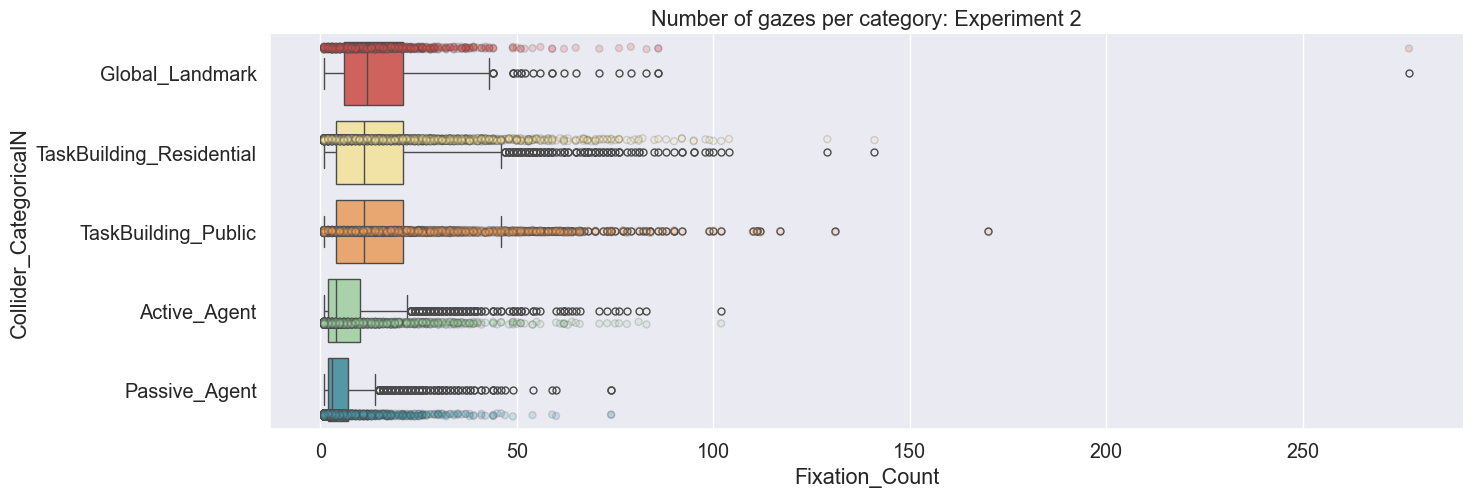

In [52]:
sns.catplot(y="Collider_CategoricalN", x="Fixation_Count", order= Fixation_count.index.values, data=Fixations, \
            height=5, aspect=3, kind='box', palette=my_categories).set(title="Number of gazes per category: Experiment 2")
ax = sns.stripplot(y="Collider_CategoricalN", x="Fixation_Count",  order= Fixation_count.index.values, data=Fixations, \
                   alpha=0.2, dodge=True,linewidth=1,edgecolor='gray', palette=my_categories)

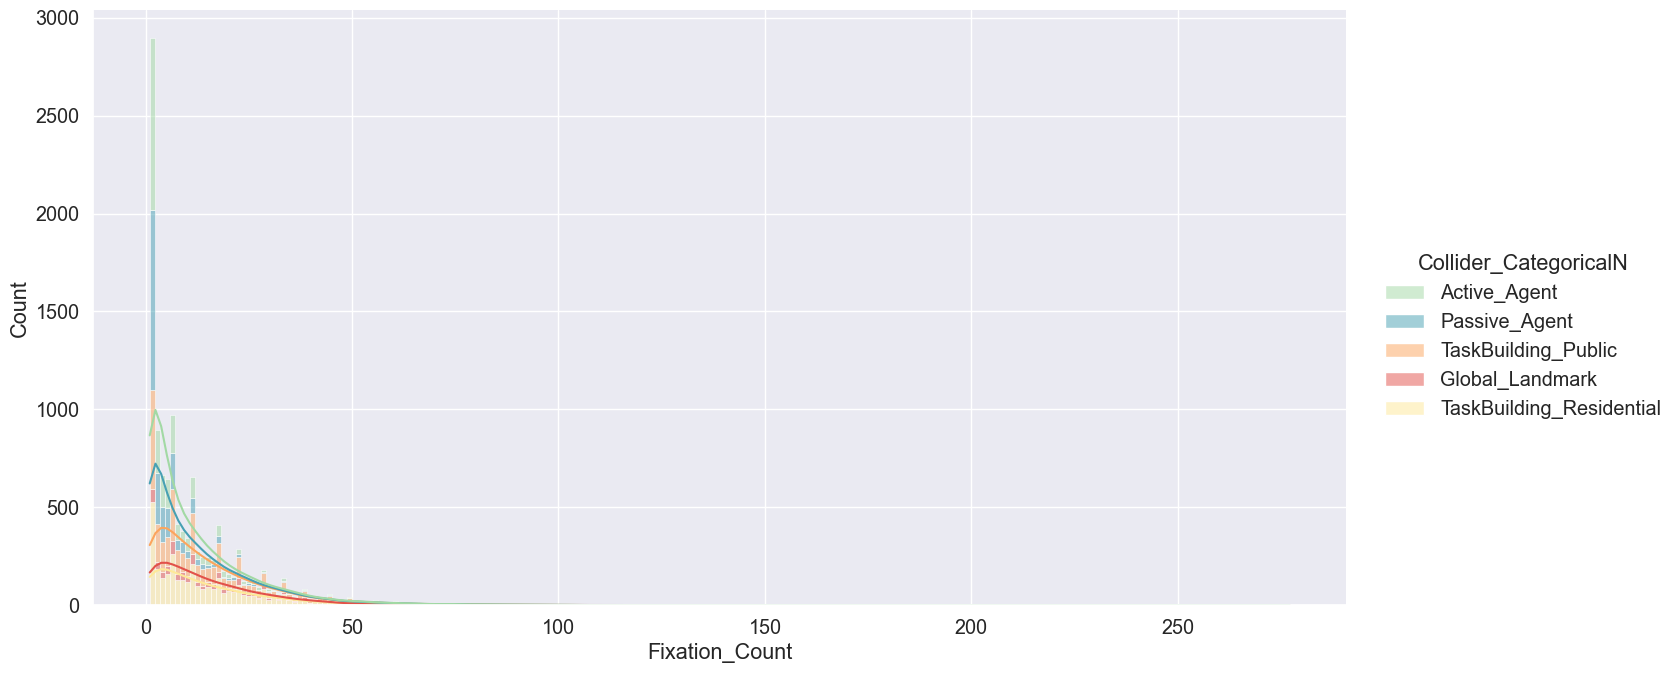

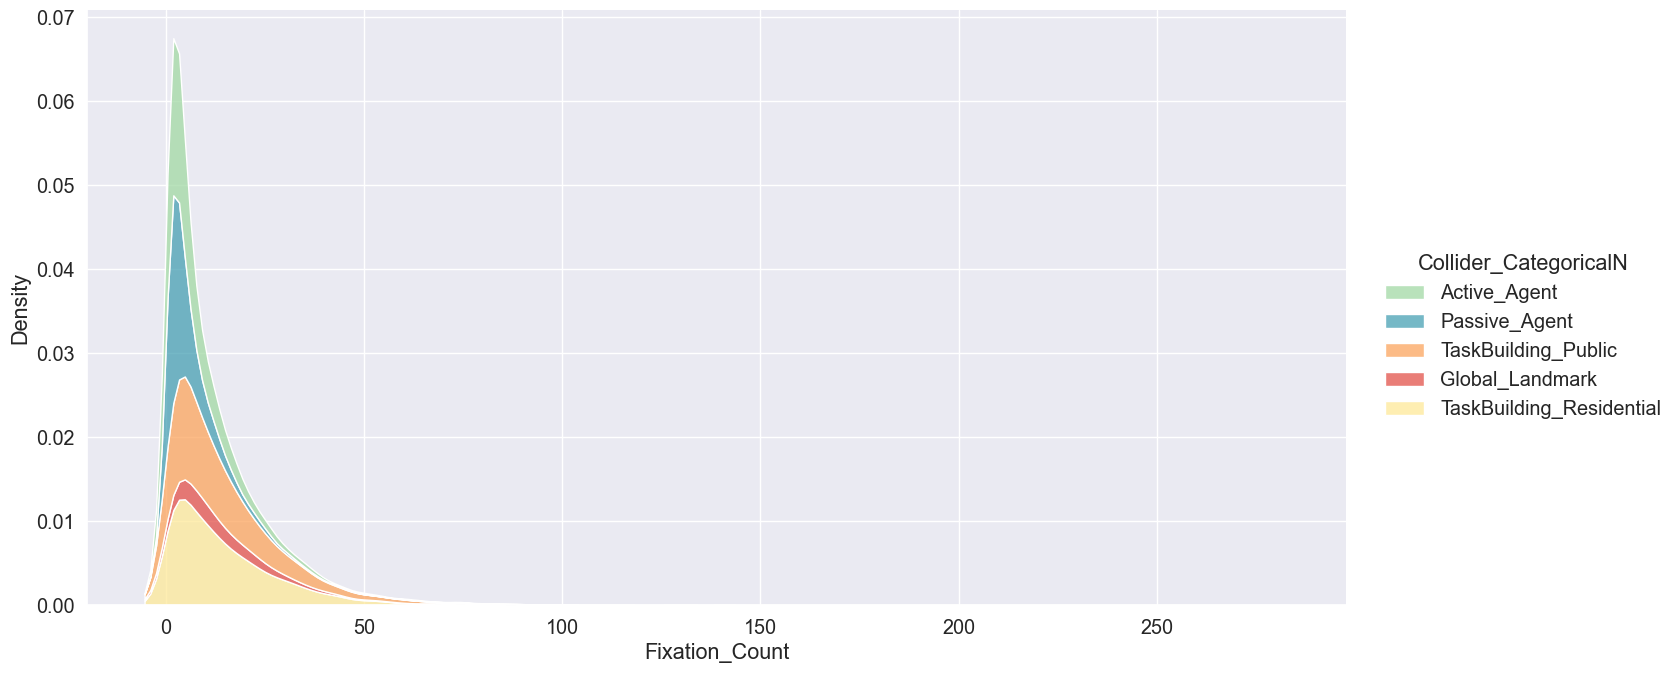

In [53]:
sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kde=True, palette=my_categories, multiple="stack")

sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kind="kde", palette=my_categories, multiple="stack")

In [54]:
Fixation_Dwelling_Time = pd.DataFrame(Fixations.groupby("Collider_CategoricalN")["Dwelling_Time"].mean().sort_values(ascending=False))
Fixation_Dwelling_Time

,Dwelling_Time
Collider_CategoricalN,
Global_Landmark,9.691
TaskBuilding_Public,8.545
TaskBuilding_Residential,8.367
Active_Agent,3.794
Passive_Agent,2.548


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/1356879902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y="Collider_CategoricalN", x="Dwelling_Time", order= Fixation_Dwelling_Time.index.values, data=Fixations, \
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/1356879902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(y="Collider_CategoricalN", x="Dwelling_Time",  order= Fixation_Dwelling_Time.index.values, data=Fixations, \
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_11912/1356879902.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.st

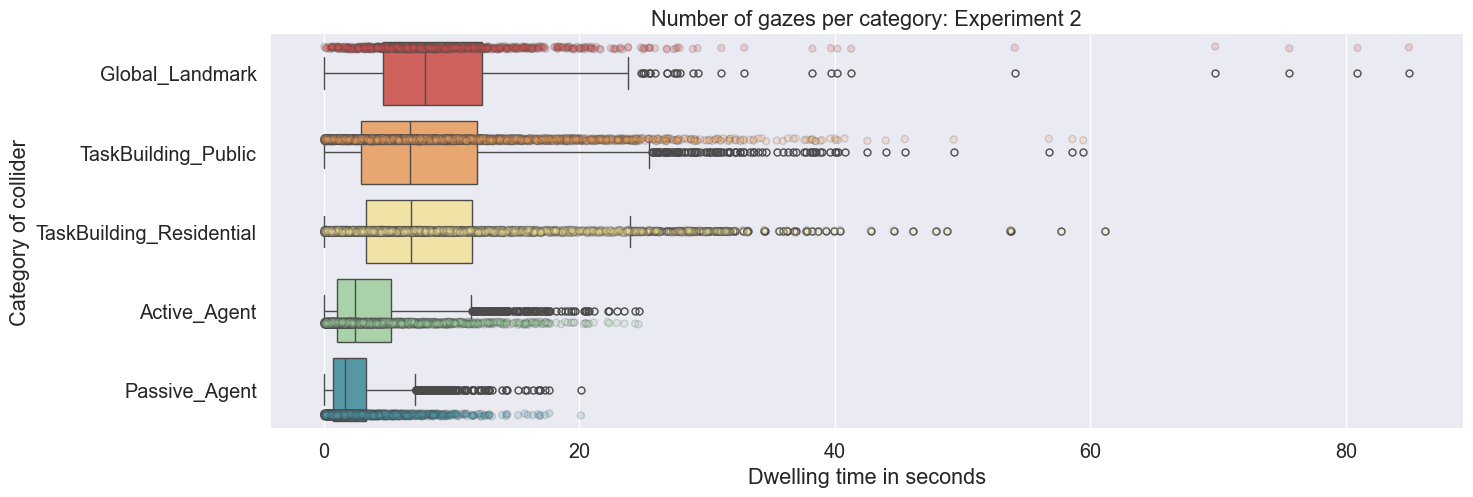

In [55]:
sns.catplot(y="Collider_CategoricalN", x="Dwelling_Time", order= Fixation_Dwelling_Time.index.values, data=Fixations, \
            height=5, aspect=3, kind='box', palette=my_categories)
ax = sns.stripplot(y="Collider_CategoricalN", x="Dwelling_Time",  order= Fixation_Dwelling_Time.index.values, data=Fixations, \
                   alpha=0.2, dodge=True,linewidth=1,edgecolor='gray', palette=my_categories).set(title="Number of gazes per category: Experiment 2", xlabel="Dwelling time in seconds", ylabel= "Category of collider")

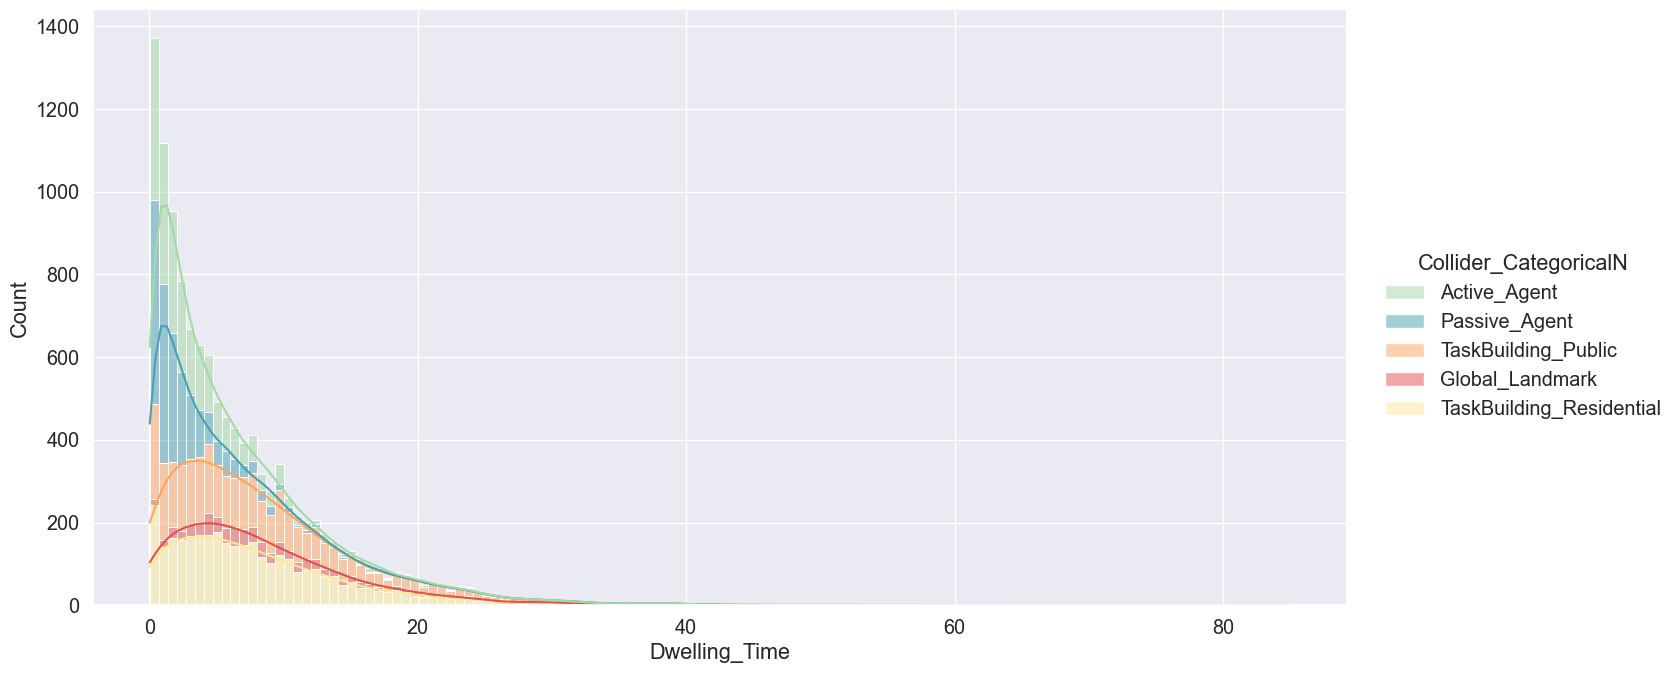

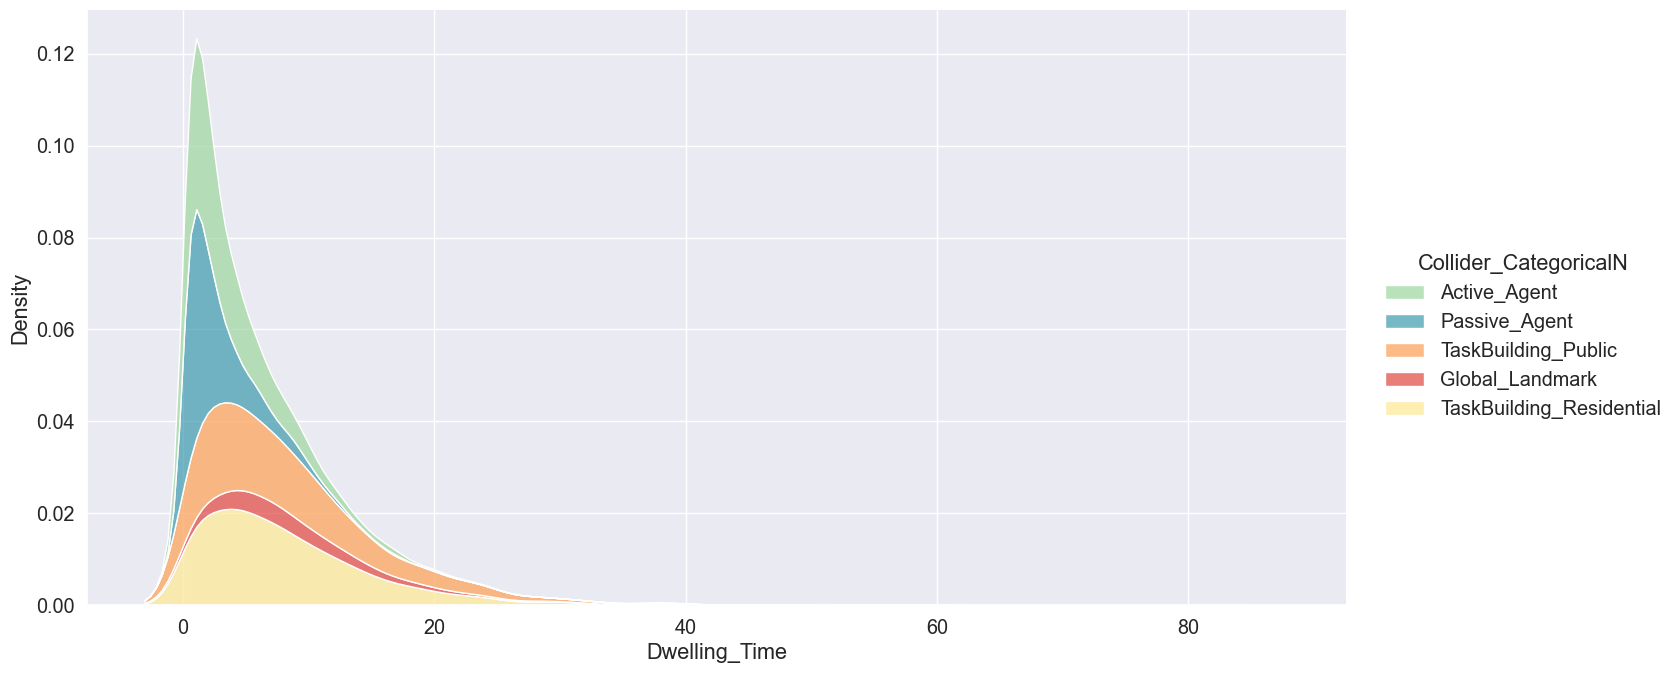

In [56]:
sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kde=True, palette=my_categories, multiple="stack")

sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations, 
            height=7, aspect= 2, kind="kde", palette=my_categories, multiple="stack")

<Axes: xlabel='Fixation_Count', ylabel='Dwelling_Time'>

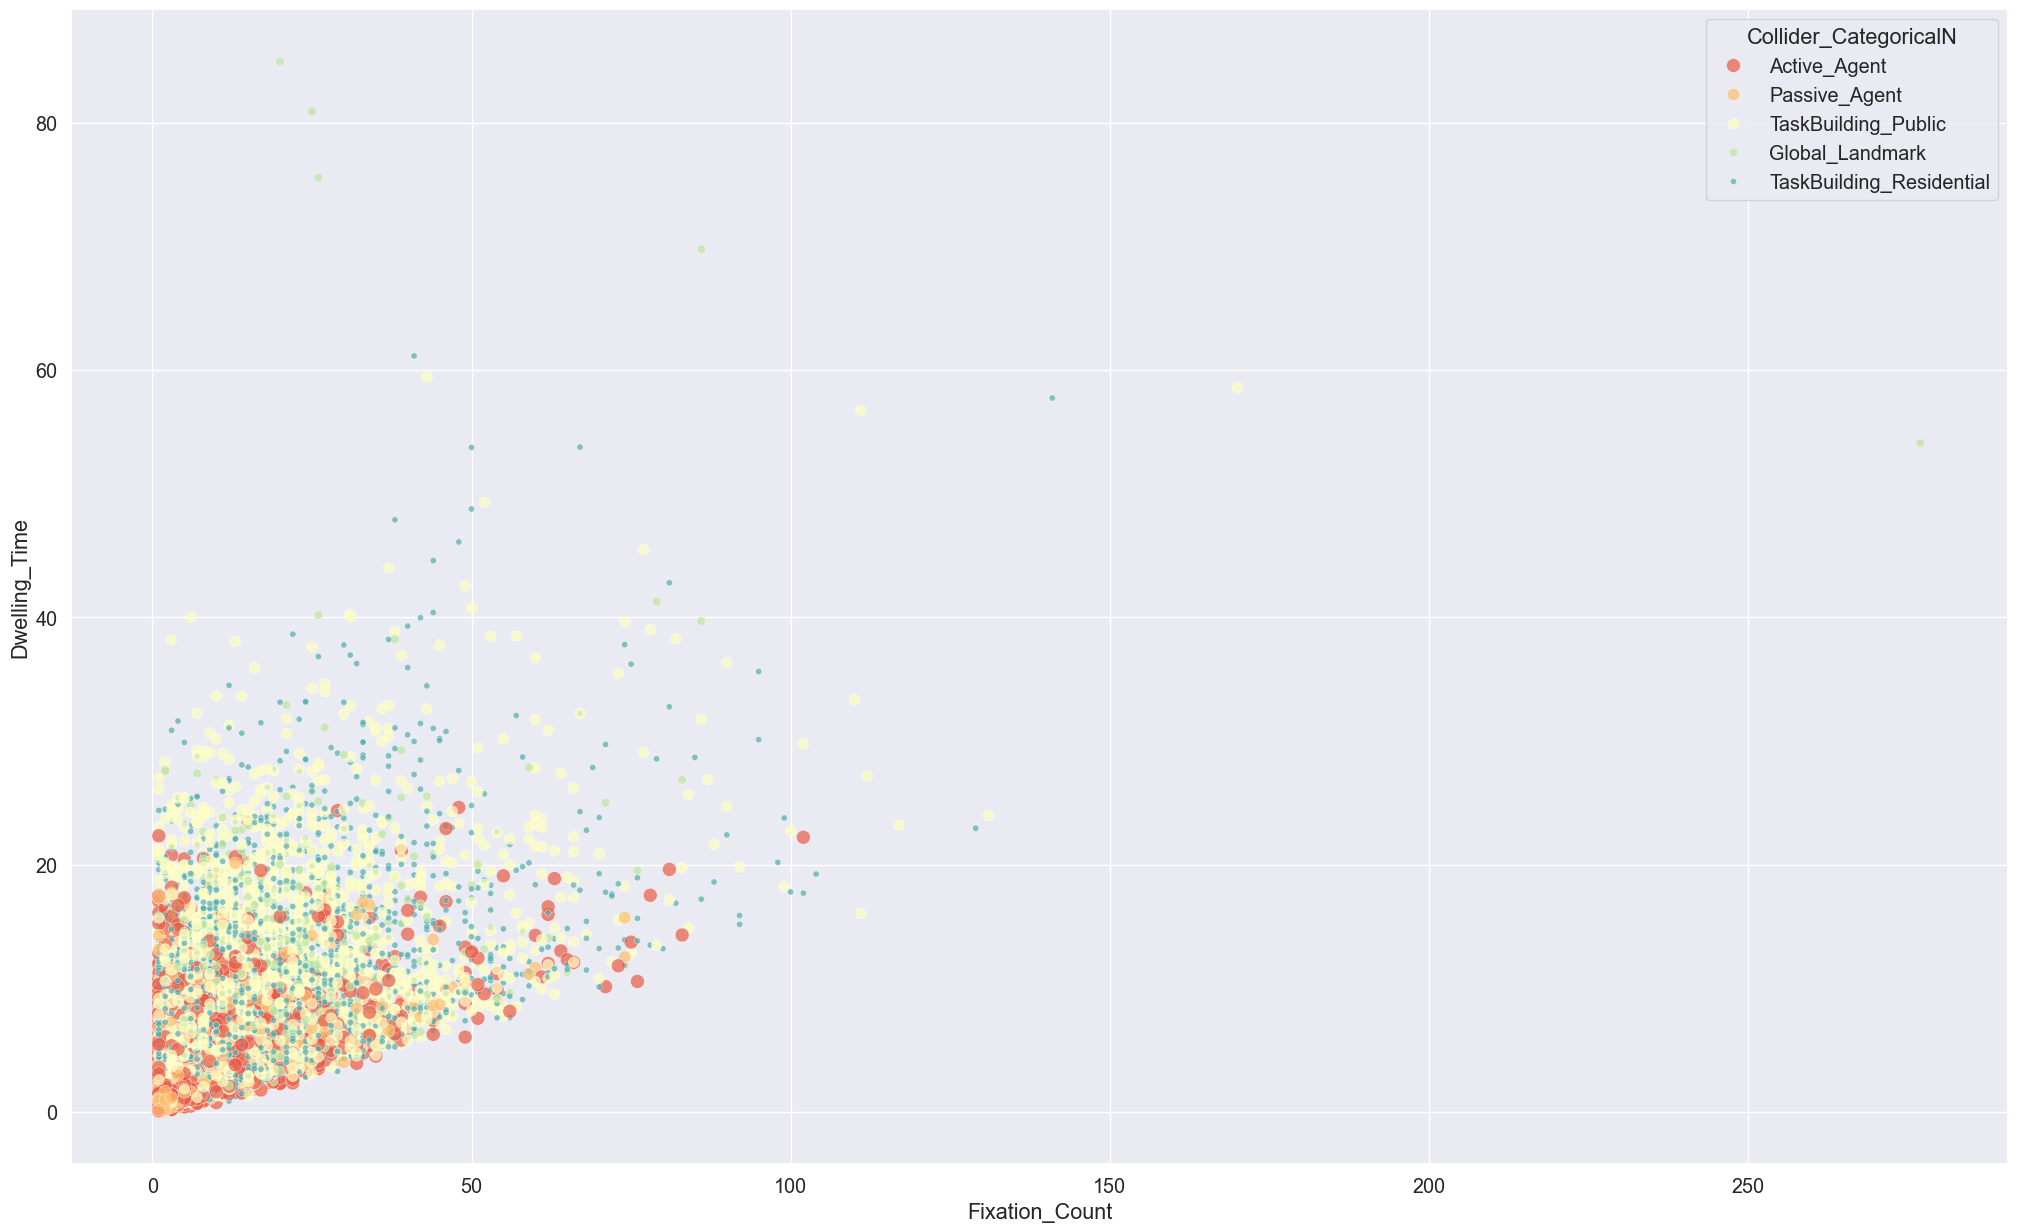

In [57]:
plt.figure(figsize=(25,15))
sns.set(font_scale = 1.3)
sns.scatterplot(x='Fixation_Count', y='Dwelling_Time', hue="Collider_CategoricalN",
                size="Collider_CategoricalN", sizes=(20,100), legend="full", data=Fixations, alpha=0.7, palette="Spectral")

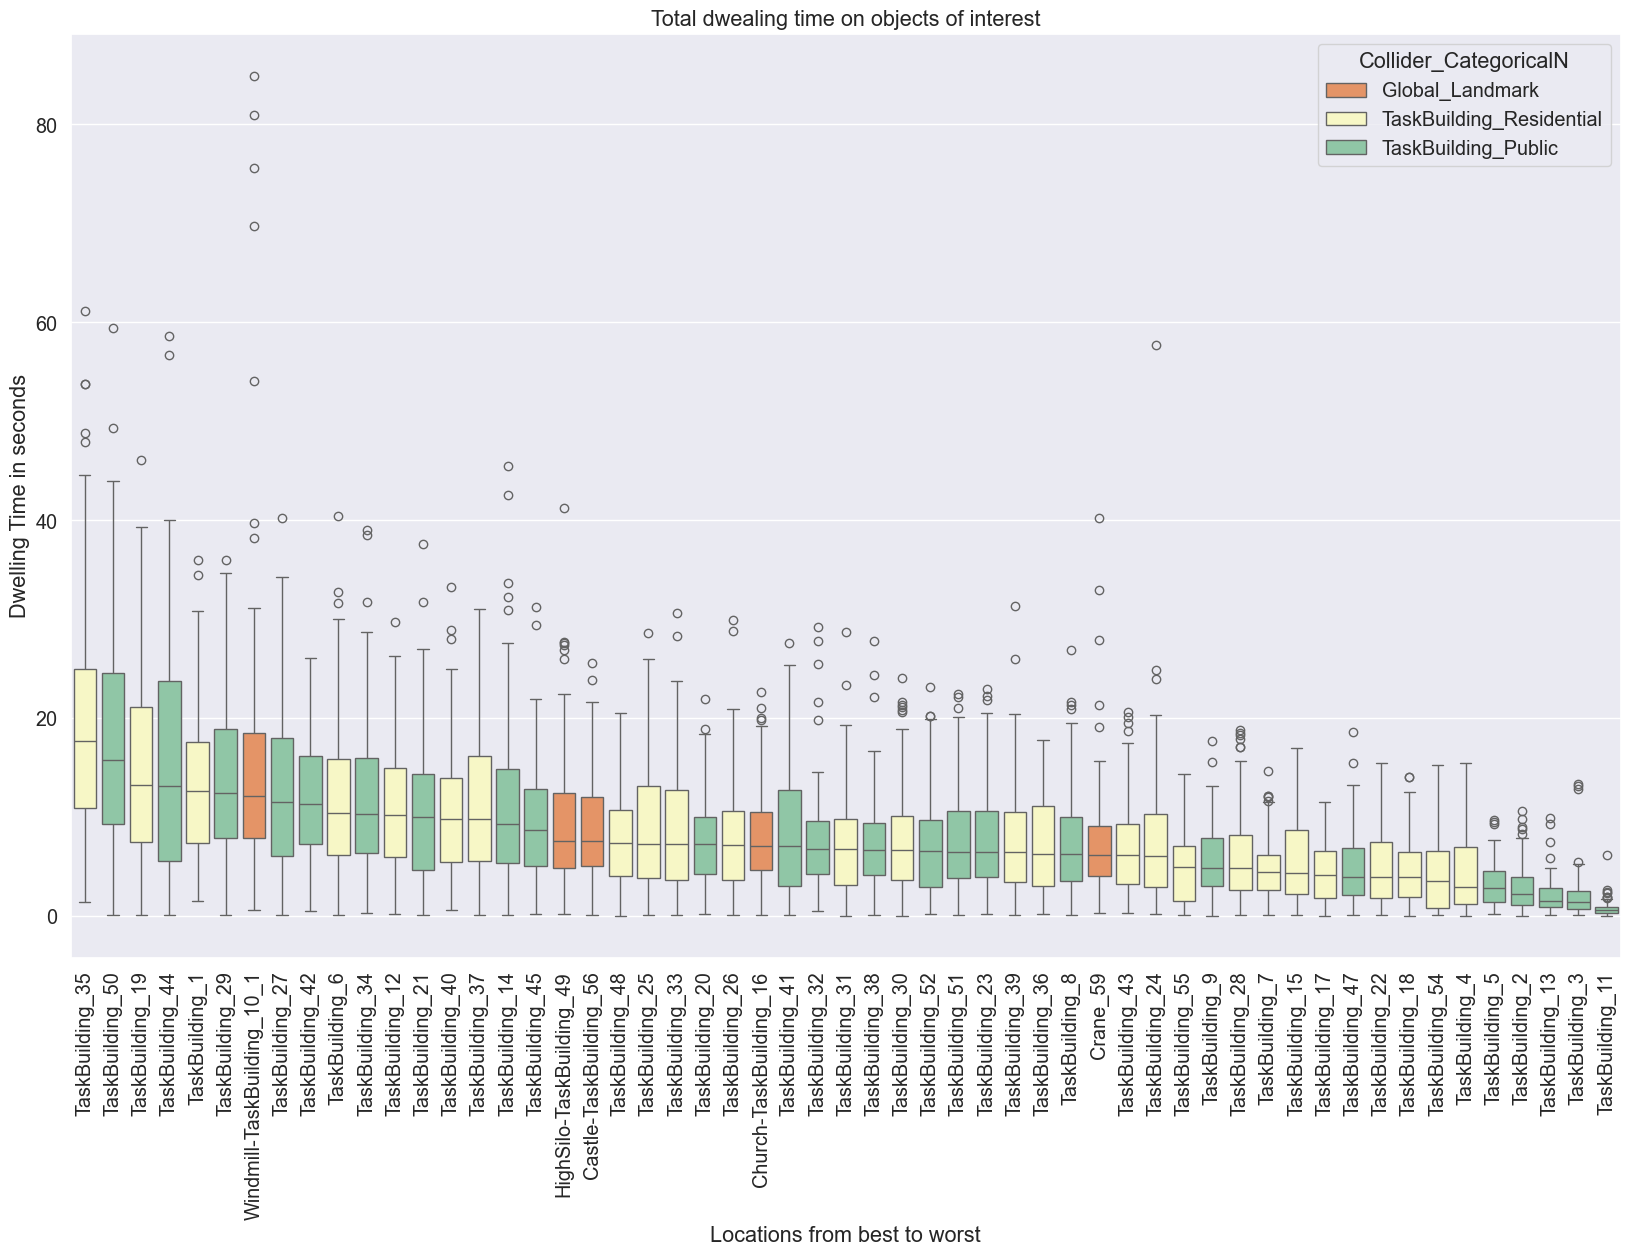

In [58]:
plt.figure(figsize=(20,12))
a = sns.boxplot(x='recoded', y='Dwelling_Time', dodge=False, hue="Collider_CategoricalN", order= order_buildings.index.values, data=TaskBuildings_GL, palette="Spectral")
plt.title('Total dwealing time on objects of interest')
plt.xlabel('Locations from best to worst')
plt.ylabel('Dwelling Time in seconds')
plt.xticks(rotation=90);

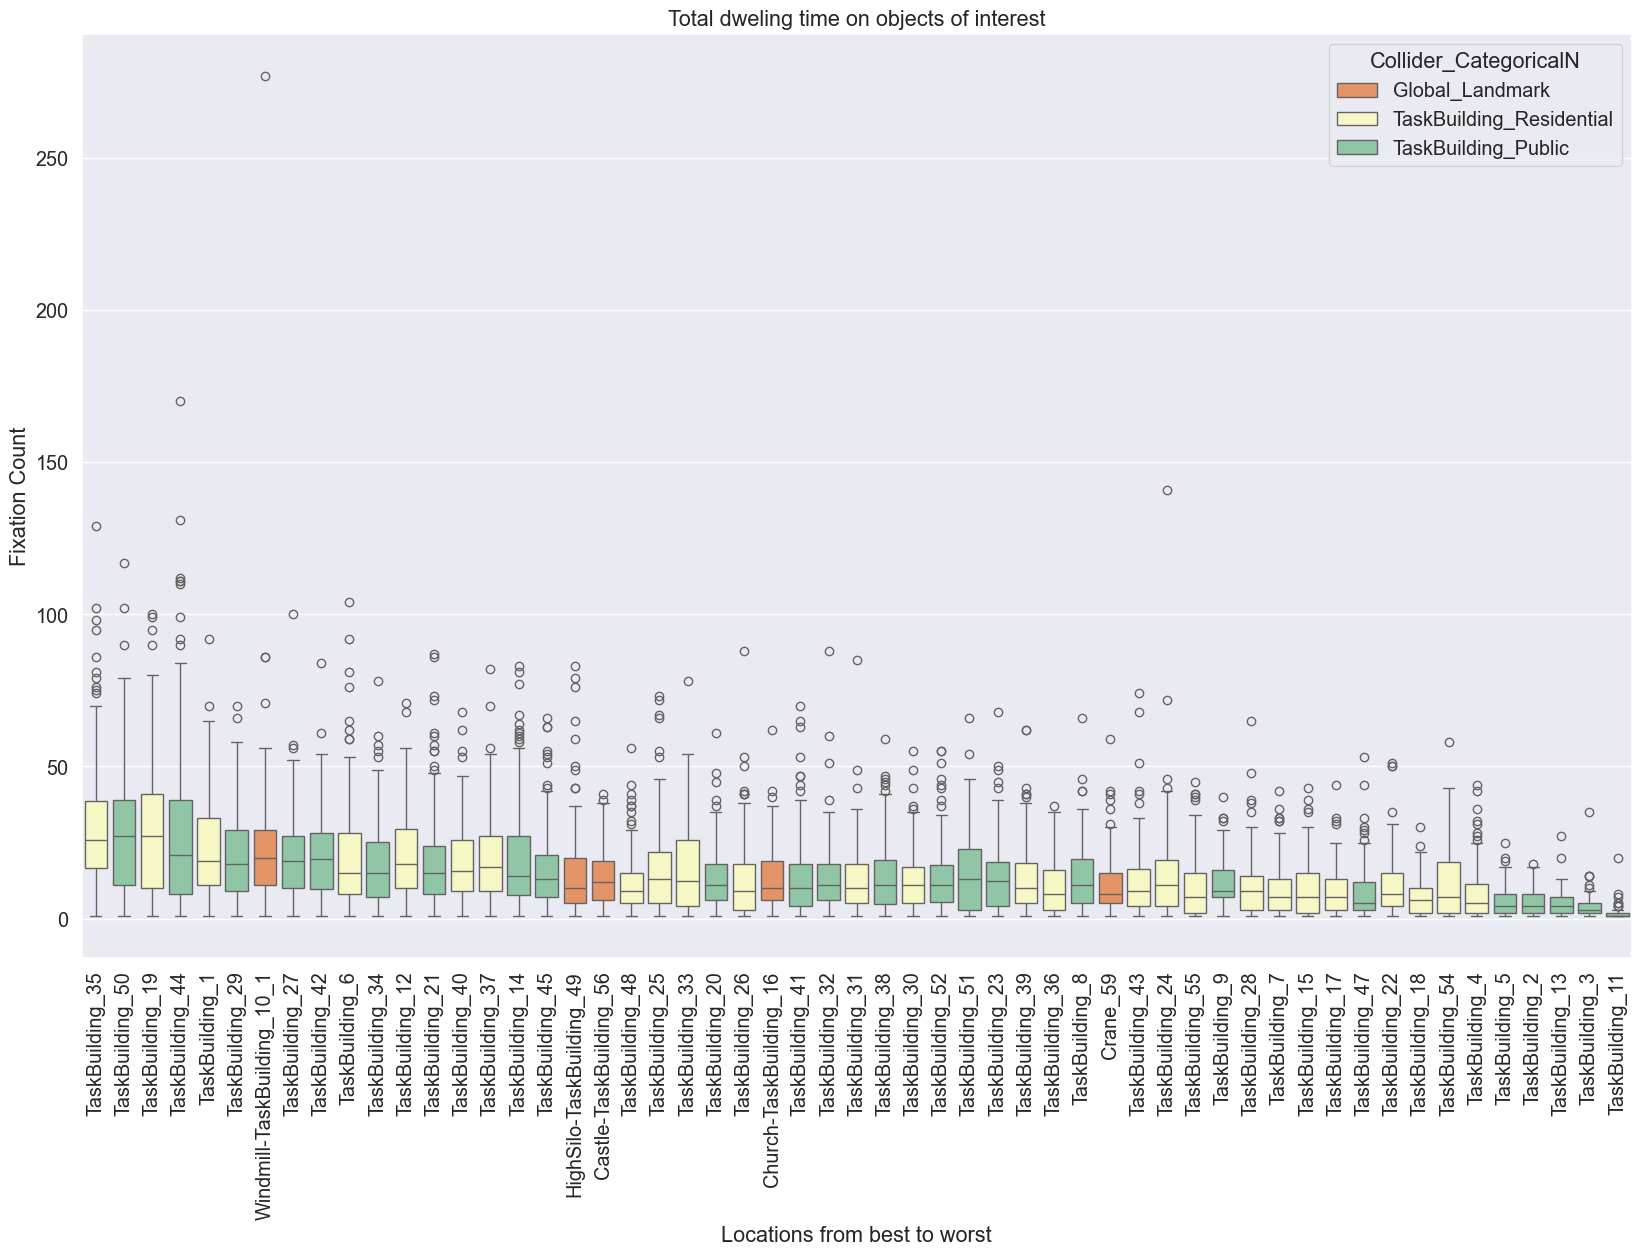

In [59]:
plt.figure(figsize=(20,12))
a = sns.boxplot(x='recoded', y='Fixation_Count', dodge=False, hue="Collider_CategoricalN", order= order_buildings.index.values, data=TaskBuildings_GL, palette="Spectral")
plt.title('Total dweling time on objects of interest')
plt.xlabel('Locations from best to worst')
plt.ylabel('Fixation Count')
plt.xticks(rotation=90);

In [60]:
my_categories_agent = {'Active_Agent': '#a2d9a4',
                'Passive_Agent': '#47a0b3'}

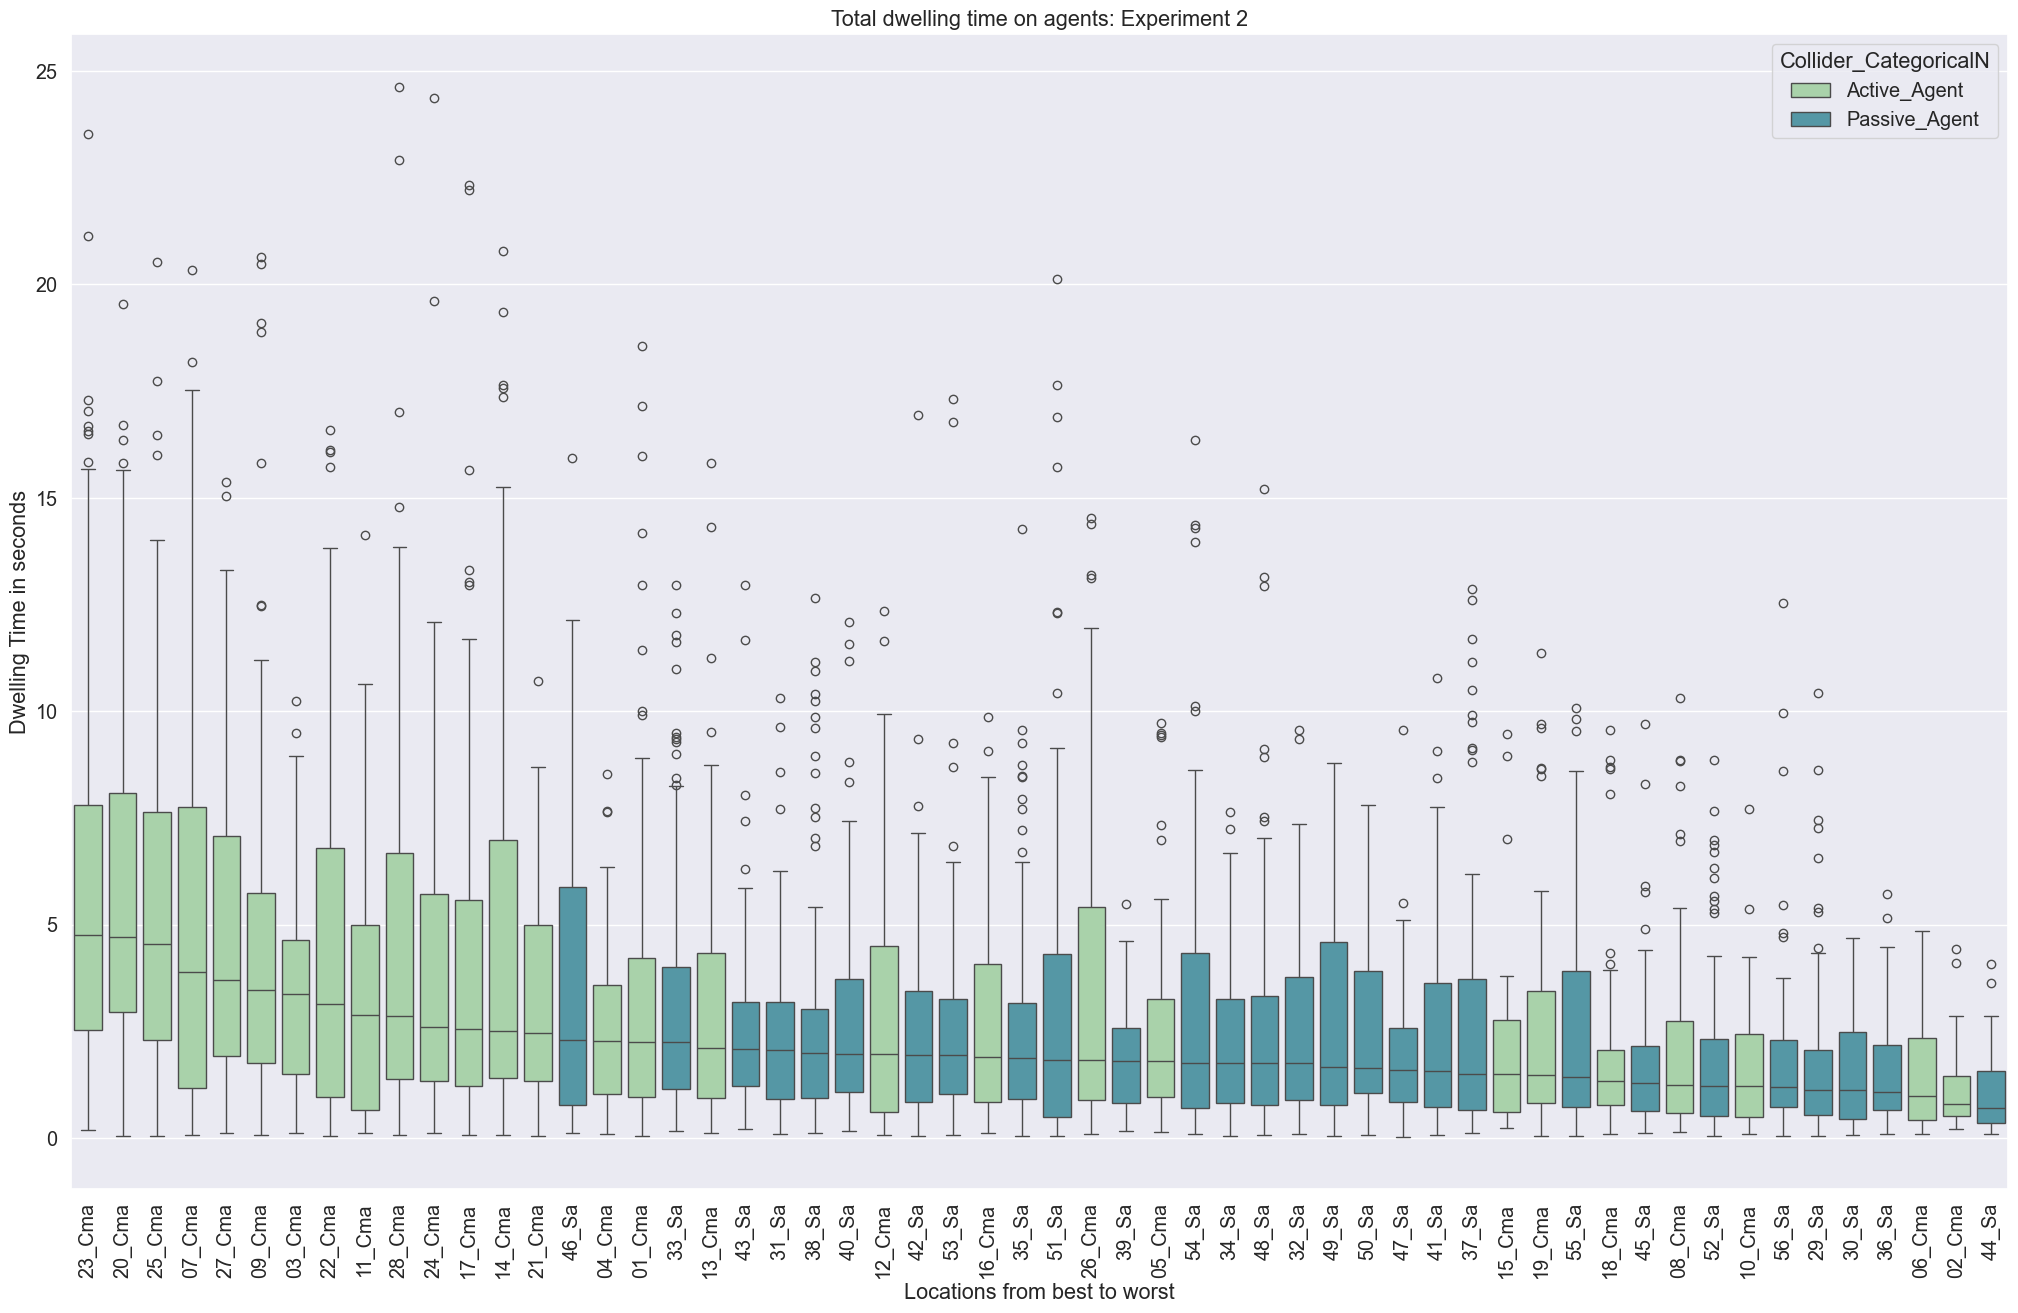

In [61]:
plt.figure(figsize=(25,15))
a = sns.boxplot(x='recoded', y='Dwelling_Time', dodge=False, hue="Collider_CategoricalN", order= order_agents.index.values, data=Agents, palette=my_categories_agent)
plt.title('Total dwelling time on agents: Experiment 2')
plt.xlabel('Locations from best to worst')
plt.ylabel('Dwelling Time in seconds')
plt.xticks(rotation=90);

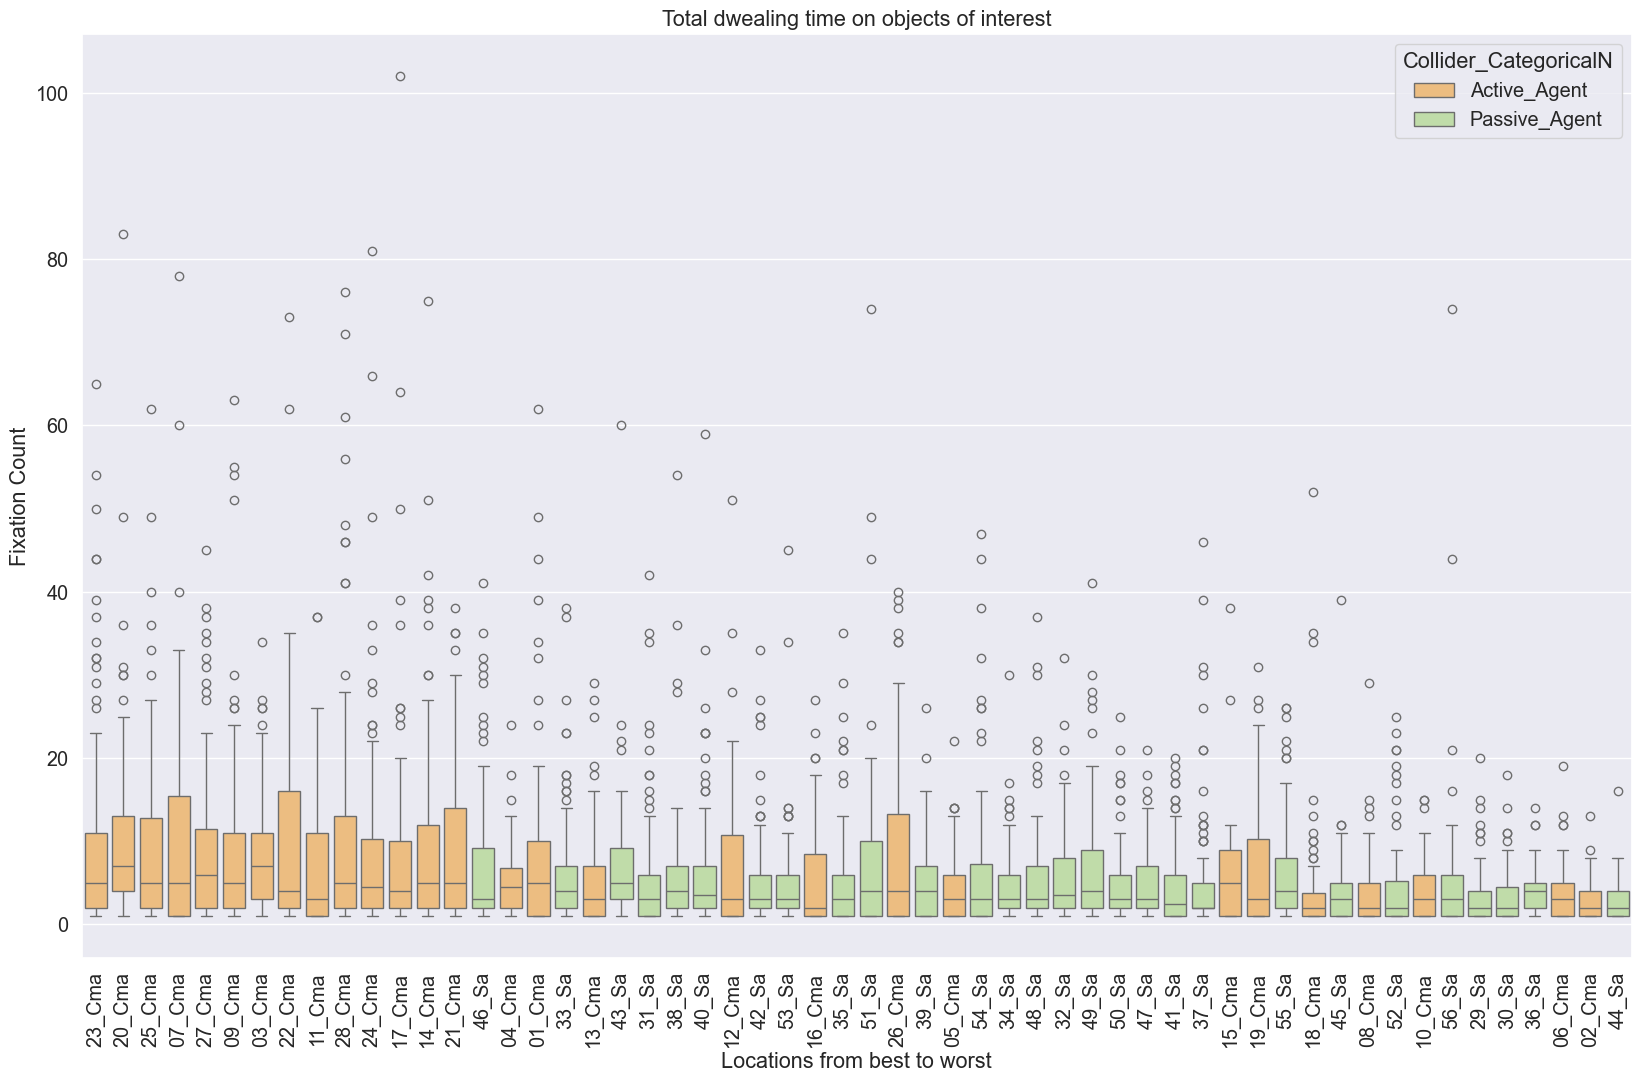

In [62]:
plt.figure(figsize=(20,12))
a = sns.boxplot(x='recoded', y='Fixation_Count', dodge=False, hue="Collider_CategoricalN", order= order_agents.index.values, data=Agents, palette="Spectral")
plt.title('Total dwealing time on objects of interest')
plt.xlabel('Locations from best to worst')
plt.ylabel('Fixation Count')
plt.xticks(rotation=90);

## Preparation for the merging of behavioral data with Dwelling times 

In [63]:
# Create a dictionary that identifies: Agent, Building, and graffity with one ID
patterns1 = {'^01_Cma$':1}
patterns1.update(dict.fromkeys(['^TaskBuilding_14$','^Graffity_14$'], 1))
patterns1.update(dict.fromkeys(['^02_Cma$','^TaskBuilding_41$','^Graffity_41$'], 2))
patterns1.update(dict.fromkeys(['^03_Cma$','^TaskBuilding_2$', '^Graffity_02$'], 3))
patterns1.update(dict.fromkeys(['^04_Cma$','^TaskBuilding_47$','^Graffity_47$'], 4))
patterns1.update(dict.fromkeys(['^05_Cma$','^Construction_57$'], 5))
patterns1.update(dict.fromkeys(['^06_Cma$','^TaskBuilding_20$','^Graffity_20$'], 6))
patterns1.update(dict.fromkeys(['^07_Cma$','^TaskBuilding_9$','^Graffity_09$'], 7))
patterns1.update(dict.fromkeys(['^08_Cma$','^TaskBuilding_50$','^Graffity_50$'], 8))
patterns1.update(dict.fromkeys(['^09_Cma$','^TaskBuilding_45$','^Graffity_45$'], 9))
patterns1.update(dict.fromkeys(['^10_Cma$','^TaskBuilding_8$','^Graffity_08$'], 10))
patterns1.update(dict.fromkeys(['^11_Cma$','^TaskBuilding_27$','^Graffity_27$'], 11))
patterns1.update(dict.fromkeys(['^12_Cma$','^TaskBuilding_51$','^Graffity_51$'], 12))
patterns1.update(dict.fromkeys(['^13_Cma$','^TaskBuilding_3$','^Graffity_03$'], 13))
patterns1.update(dict.fromkeys(['^14_Cma$','^TaskBuilding_11$','^Graffity_11$'], 14))
patterns1.update(dict.fromkeys(['^15_Cma$','^TaskBuilding_42$','^Graffity_42$'], 15))
patterns1.update(dict.fromkeys(['^16_Cma$','^TaskBuilding_23$','^Graffity_23$'], 16))
patterns1.update(dict.fromkeys(['^17_Cma$','^TaskBuilding_52$','^Graffity_52$'], 17))
patterns1.update(dict.fromkeys(['^18_Cma$','^TaskBuilding_38$','^Graffity_38$'], 18))
patterns1.update(dict.fromkeys(['^19_Cma$','^TaskBuilding_34$','^Graffity_34$'], 19))
patterns1.update(dict.fromkeys(['^20_Cma$','^BasketballCourt_58$'], 20))
patterns1.update(dict.fromkeys(['^21_Cma$','^TaskBuilding_5$','^Graffity_05$'], 21))
patterns1.update(dict.fromkeys(['^22_Cma$','^TaskBuilding_29$','^Graffity_29$'], 22))
patterns1.update(dict.fromkeys(['^23_Cma$','^TaskBuilding_32$','^Graffity_32$'], 23))
patterns1.update(dict.fromkeys(['^24_Cma$','^TaskBuilding_13$','^Graffity_13$'], 24))
patterns1.update(dict.fromkeys(['^25_Cma$','^TaskBuilding_44$','^Graffity_44$'], 25))
patterns1.update(dict.fromkeys(['^26_Cma$','^TaskBuilding_21$','^Graffity_21$'], 26))
patterns1.update(dict.fromkeys(['^27_Cma$','^Crane_59$', 'Castle-TaskBuilding_56'], 27))
patterns1.update(dict.fromkeys(['^28_Cma$','^Church-TaskBuilding_16'], 28))
patterns1.update(dict.fromkeys(['^29_Sa$','^TaskBuilding_4$','^Graffity_04$'], 29))
patterns1.update(dict.fromkeys(['^30_Sa$','^TaskBuilding_1$','^Graffity_01$'], 30))
patterns1.update(dict.fromkeys(['^31_Sa$','^TaskBuilding_6$','^Graffity_06$'], 31))
patterns1.update(dict.fromkeys(['^32_Sa$','^TaskBuilding_7$','^Graffity_07$'], 32))
patterns1.update(dict.fromkeys(['^33_Sa$','^TaskBuilding_17$','^Graffity_17$'], 33))
patterns1.update(dict.fromkeys(['^34_Sa$','^TaskBuilding_15$','^Graffity_15$'], 34))
patterns1.update(dict.fromkeys(['^35_Sa$','^TaskBuilding_12$','^Graffity_12$'], 35))
patterns1.update(dict.fromkeys(['^36_Sa$','^TaskBuilding_18$','^Graffity_18$'], 36))
patterns1.update(dict.fromkeys(['^37_Sa$','^TaskBuilding_19$','^Graffity_19$'], 37))
patterns1.update(dict.fromkeys(['^38_Sa$','^TaskBuilding_22$','^Graffity_22$'], 38))
patterns1.update(dict.fromkeys(['^39_Sa$','^TaskBuilding_24$','^Graffity_24$'], 39))
patterns1.update(dict.fromkeys(['^40_Sa','^TaskBuilding_25$','^Graffity_25$'], 40))
patterns1.update(dict.fromkeys(['^41_Sa','^TaskBuilding_26$','^Graffity_26$'], 41))
patterns1.update(dict.fromkeys(['^42_Sa','^TaskBuilding_28$','^Graffity_28$'], 42))
patterns1.update(dict.fromkeys(['^43_Sa','^TaskBuilding_30$','^Graffity_30$'], 43))
patterns1.update(dict.fromkeys(['^44_Sa','^TaskBuilding_31$','^Graffity_31$'], 44))
patterns1.update(dict.fromkeys(['^45_Sa','^TaskBuilding_33$','^Graffity_33$'], 45))
patterns1.update(dict.fromkeys(['^46_Sa','^TaskBuilding_35$','^Graffity_35$'], 46))
patterns1.update(dict.fromkeys(['^47_Sa','^TaskBuilding_36$','^Graffity_36$'], 47))
patterns1.update(dict.fromkeys(['^48_Sa','^TaskBuilding_37$','^Graffity_37$'], 48))
patterns1.update(dict.fromkeys(['^49_Sa','^TaskBuilding_39$','^Graffity_39$'], 49))
patterns1.update(dict.fromkeys(['^50_Sa','^TaskBuilding_40$','^Graffity_40$'], 50))
patterns1.update(dict.fromkeys(['^51_Sa','^TaskBuilding_43$','^Graffity_43$'], 51))
patterns1.update(dict.fromkeys(['^52_Sa','^TaskBuilding_48$','^Graffity_48$'], 52))
patterns1.update(dict.fromkeys(['^53_Sa','^TaskBuilding_54$','^Graffity_54$'], 53))
patterns1.update(dict.fromkeys(['^54_Sa','^TaskBuilding_55$','^Graffity_55$'], 54))
patterns1.update(dict.fromkeys(['^55_Sa','^Windmill-TaskBuilding_10_1'], 55))
patterns1.update(dict.fromkeys(['^56_Sa','^HighSilo-TaskBuilding_49'], 56))
default_val = np.nan

In [64]:
Fixations['avatar_ID'] = Fixations['recoded'].apply(lambda x: next((val for key, val in patterns1.items() if re.match(key, x)), default_val))    

In [65]:
Fixations['Category'] = np.where(Fixations.Collider_CategoricalN.str.contains("Agent"), "Agent_Gaze", "Building_Gaze")

In [66]:
Agent_Fixation = Fixations[Fixations.Category == "Agent_Gaze"]
Building_Fixation = Fixations[Fixations.Category == "Building_Gaze"]
Building_Fixation = Building_Fixation[Building_Fixation.recoded != 'Crane_59'].copy()

In [67]:
Fixations

,SubjectID,Session,recoded,Collider_CategoricalN,Dwelling_Time,Fixation_Count,avatar_ID,Category
0,1031,1,01_Cma,Active_Agent,2.099,10,1,Agent_Gaze
1,1031,1,03_Cma,Active_Agent,1.707,14,3,Agent_Gaze
2,1031,1,09_Cma,Active_Agent,3.318,22,9,Agent_Gaze
3,1031,1,14_Cma,Active_Agent,1.930,9,14,Agent_Gaze
4,1031,1,17_Cma,Active_Agent,1.254,4,17,Agent_Gaze
...,...,...,...,...,...,...,...,...
11828,9627,5,TaskBuilding_6,TaskBuilding_Residential,9.363,2,31,Building_Gaze
11829,9627,5,TaskBuilding_7,TaskBuilding_Residential,6.325,4,32,Building_Gaze
11830,9627,5,TaskBuilding_8,TaskBuilding_Public,10.597,2,10,Building_Gaze
11831,9627,5,TaskBuilding_9,TaskBuilding_Public,9.780,18,7,Building_Gaze


In [68]:
Agent_wide_Fixations = Agent_Fixation.pivot(index=["SubjectID", 'avatar_ID'], columns='Category', values=["Dwelling_Time", "Fixation_Count"])
Building_wide_Fixations = Building_Fixation.pivot(index=["SubjectID", 'avatar_ID'], columns='Category', values=["Dwelling_Time", "Fixation_Count"])
Agent_wide_Fixations.reset_index(inplace=True)
Building_wide_Fixations.reset_index(inplace=True)

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
Agent_wide_Fixations.columns = ['_'.join(col) for col in Agent_wide_Fixations.columns]
Building_wide_Fixations.columns = ['_'.join(col) for col in Building_wide_Fixations.columns]
Agent_wide_Fixations

In [ ]:
Agent_wide_Fixations.rename({"SubjectID_":"SubjectID", "avatar_ID_":"avatar_ID"}, inplace=True, axis=1)
Building_wide_Fixations.rename({"SubjectID_":"SubjectID", "avatar_ID_":"avatar_ID"}, inplace=True, axis=1)

In [ ]:
wide_Fixations = Building_wide_Fixations.merge(Agent_wide_Fixations, on=["SubjectID", "avatar_ID"])
wide_Fixations.to_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/wide_Fixation.csv")

In [ ]:
sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations[Fixations.Dwelling_Time < 40], 
            height=7, aspect= 2, kde=True, palette="Spectral",  multiple="stack")

sns.displot(x='Dwelling_Time', hue="Collider_CategoricalN",
             data=Fixations[Fixations.Dwelling_Time < 40], 
            height=7, aspect= 2, kind="kde", palette="Spectral",  multiple="stack")

sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations[Fixations.Dwelling_Time < 40], 
            height=7, aspect= 2, kde=True, palette="Spectral",  multiple="stack")

sns.displot(x='Fixation_Count', hue="Collider_CategoricalN",
             data=Fixations[Fixations.Dwelling_Time < 40], 
            height=7, aspect= 2, kind="kde", palette="Spectral",  multiple="stack")

In [ ]:
Behavioral = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Pointing_Task/Results/BuildingPointingSummary_exp2.csv")
Agent_behavioral = pd.read_csv("/Volumes/TwoTeras/1_Experiment_2/Pointing_Task/Results/AgentPointingSummary.csv")

In [ ]:
display(Behavioral.info())
display(Agent_behavioral.info())

In [ ]:
Agent_behavioral.columns = Agent_behavioral.columns.str.replace('_Agent','')
Agent_behavioral.info()

In [ ]:
Behavioral.rename({"ID":"SubjectID", "avatarID":"avatar_ID"}, axis=1, inplace=True)
Agent_behavioral.rename({"ID":"SubjectID", "avatarID":"avatar_ID"}, axis=1, inplace=True)

In [ ]:
Agent_behavioral.head()

In [ ]:
BehavioralData_Fixations_Wide = Behavioral.merge(wide_Fixations, on=["SubjectID", "avatar_ID"], how="left")
AgentData_Fixations_Wide = Agent_behavioral.merge(wide_Fixations, on=["SubjectID", "avatar_ID"], how="left")
display(BehavioralData_Fixations_Wide.info())
display(AgentData_Fixations_Wide.info())

BehavioralData_Fixations_Wide.head()

In [ ]:
len(AgentData_Fixations_Wide.SubjectID.unique())

In [ ]:
BehavioralData_Fixations_Wide["Agent_Category"] = np.where(BehavioralData_Fixations_Wide.avatar_ID > 28, "Passive", "Active")
AgentData_Fixations_Wide["Agent_Category"] = np.where(AgentData_Fixations_Wide.avatar_ID > 28, "Passive", "Active")

In [ ]:
BehavioralData_Fixations_Wide.to_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/BehavioralData_Fixations_Wide.csv")
AgentData_Fixations_Wide.to_csv("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/AgentData_Fixations_Wide.csv")

In [ ]:
BehavioralData_Fixations_Wide[['Dwelling_Time_Agent_Gaze', 'Dwelling_Time_Building_Gaze',
       'Fixation_Count_Agent_Gaze', 'Fixation_Count_Building_Gaze',  'AbsolutError' ]].corr().style.background_gradient(cmap="viridis")

In [ ]:
experiment_1 = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/BehavioralData_Fixations_Wide.csv")

In [ ]:
BehavioralData_Fixations_Wide = BehavioralData_Fixations_Wide.loc[:, ~BehavioralData_Fixations_Wide.columns.str.contains('^Unnamed')]
experiment_1 = experiment_1.loc[:, ~experiment_1.columns.str.contains('^Unnamed')]
experiment_1["Experiment"]= 1
BehavioralData_Fixations_Wide["Experiment"] = 2
experiment_1.rename({"meaningfulBuilding": "BuildingCategory"}, axis=1, inplace=True)

In [ ]:
experiment_1.info()

In [ ]:
BehavioralData_Fixations_Wide.info()

In [ ]:
frames = [BehavioralData_Fixations_Wide, experiment_1]
result = pd.concat(frames)
result.info()

In [ ]:
result.pop("Agent_Action_level")

In [ ]:
result.head()

In [ ]:
result.to_csv("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/BehavioralData_Fixations_Wide.csv")

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.groupby([ "Hit_Object_Category", "Session"])["length"].agg(['median','count','mean','std','max', 'min'])

In [ ]:
summary_name_stats_fix_length_NS = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby([ "SubjectID",  "Hit_Object_Category", "Collider_CategoricalN","Session" ])["length"].agg(['count','mean','median','std','max', 'min']))

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.columns

In [ ]:
summary_name_stats_fix_length_NS.reset_index(inplace=True)

In [ ]:
summary_name_stats_fix_length_NS

In [ ]:
summary_name_stats_fix_length_NS_Agent = summary_name_stats_fix_length_NS[summary_name_stats_fix_length_NS.Hit_Object_Category == 'Agent'].copy()
summary_name_stats_fix_length_NS_Agent['Agent_Category'] = summary_name_stats_fix_length_NS_Agent['Collider_CategoricalN'].str.contains('Active')
summary_name_stats_fix_length_NS_Agent.loc[:, 'Agent_Category'] = summary_name_stats_fix_length_NS_Agent['Agent_Category'].replace({True: 'Active', False: 'Passive'})

In [ ]:
summary_name_stats_fix_length_NS_Agent.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/summary_name_stats_fix_length_NS_Agent.csv")

In [ ]:
summary_name_stats_fix_length_NS_Agent

In [ ]:
summary_stats_fix_length = pd.DataFrame(data_frame_gaze_no_out.groupby(["Collider_CategoricalN", "SubjectID", "Session"])["length"].agg(['count','mean','median','std','max', 'min']))
summary_stats_fix_length.reset_index(inplace=True)
summary_name_stats_fix_length.shape

In [ ]:
summary_name_stats_fix_length_BIG= pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby([ "SubjectID", "Hit_Object_Category", "Collider_CategoricalN","Session" ])["length"].agg(['count','mean','median','std','max', 'min']))

In [ ]:
summary_name_stats_fix_length_BIG.reset_index(inplace=True)
summary_name_stats_fix_length_BIG.head(20)

In [ ]:
summary_name_stats_fix_length_BIG.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Grouped_Gazes.cvs")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Hit_Object_Category", y="median", hue="Session", data=summary_name_stats_fix_length_BIG[(summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent")], \
            height=5, aspect=3, kind='box').set(title="Median length of gazes per session")
ax = sns.stripplot(x="Hit_Object_Category", y="median", hue="Session", data=summary_name_stats_fix_length_BIG[summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent"], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/counts.png',  bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="Hit_Object_Category", y="count", hue="Session", data=summary_name_stats_fix_length_BIG[(summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Hit_Object_Category", y="count", hue="Session", data=summary_name_stats_fix_length_BIG[summary_name_stats_fix_length_BIG.Hit_Object_Category == "Agent"], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/counts.png',  bbox_inches='tight')

In [ ]:
dy='Hit_Object_Category'; dx='count'; ort='h'; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(18, 15))

import ptitprince as pt

ax=pt.half_violinplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, palette = pal, bw = .2, cut = 0.,
                      scale = 'area', width = .6, inner = None, orient = ort)
ax=sns.stripplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, palette = pal, edgecolor = 'white',
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot(x = dx, y = dy, data = summary_name_stats_fix_length_BIG, color = 'black', width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', 'zorder':10},\
            showfliers=True, whiskerprops = {'linewidth':2, 'zorder':10},\
            saturation = 1, orient = ort) 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/count.png')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=100)
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/count_Faces.png',  bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=6, aspect=3, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/Median_Duration_Faces.png',  bbox_inches='tight')

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.tail()

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.columns

In [ ]:
data_frame_gaze_no_out_ONLY_TEST.groupby(["SubjectID", "SessionSubsection"])['']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=6, aspect=3, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/Median_Duration_All.png',  bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="max", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=5, aspect=4, kind='box').set(title="Maximal duration of gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="max",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/MedianDurationFaces.png')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="std", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=5, aspect=4, kind='box').set(title="Standard Deviation of gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="std",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
ax.set_ylabel("Standard Deviation of gaze duration")
plt.savefig('/Users/tracysanchezpacheco/Desktop/MedianDurationFaces.png', bbox_inches='tight')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="min", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=7, aspect=4, kind='box').set(title="Minimum duration duration of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="min",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=1)
ax.get_legend().remove()
ax.set_ylabel("Minimum duration of gazes per session")
plt.savefig('/Users/tracysanchezpacheco/Desktop/count.png', bbox_inches='tight')

In [ ]:
HumanA = pd.read_csv("/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv")

In [ ]:
HumanA["AE_Median_Standard_Duration"] = np.nanmedian(abs(HumanA.AbsolutError - np.nanmedian(HumanA.AbsolutError))) * 1.4826
HumanA["AE_mad_z"] = abs(HumanA.AbsolutError.tolist() - np.nanmedian(HumanA.AbsolutError)) / HumanA.AE_Median_Standard_Duration.tolist()
HumanA["Outlier_AE_Length"] = np.where(HumanA["AE_mad_z"] > 3.5, "Out", "Stays")
HumanA["RT_Median_Standard_Duration"] = np.nanmedian(abs(HumanA.RT - np.nanmedian(HumanA.RT))) * 1.4826
HumanA["RT_mad_z"] = abs(HumanA.RT.tolist() - np.nanmedian(HumanA.RT)) / HumanA.RT_Median_Standard_Duration.tolist()
HumanA["Outlier_RT_Length"] = np.where(HumanA["RT_mad_z"] > 3.5, "Out", "Stays")
HumanA_OUT = HumanA[(HumanA.Outlier_AE_Length != "Out") & (HumanA.Outlier_RT_Length != "Out")]
HumanA_OUT.to_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/HumanA_NoOut.cvs")

In [ ]:
data_frame.head(50)

In [ ]:
data_frame.info()

In [ ]:
data_frame.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV.cvs")

In [ ]:
One_participant.columns

In [ ]:
One_participant.drop(columns=['Unnamed: 0', 'level_0','Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)

In [ ]:
One_participant.events.value_counts()

In [ ]:
One_participant['avg_shift'] = One_participant['avg_dist'].shift(1) != One_participant['avg_dist']

In [ ]:
data_frame.iloc[115318:115322,6:9]

In [ ]:
data_frame.info()

In [ ]:
One_participant.iloc[115521:115532,45:50]

In [ ]:
One_participant.iloc[115318:115322,6]

In [ ]:
One_participant.iloc[115322,6] - One_participant.iloc[115318,6]

In [ ]:
One_participant.iloc[115532,6] - One_participant.iloc[115521,6]

In [ ]:
One_participant.tail(200)

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
df